In [6]:
#!pip install pytest-warnings==0.3.1
#!pip install numpy==1.25.1
#!pip install pandas==2.0.3
#!pip install matplotlib==3.7.2
#!pip install stikit-learn==1.3.0

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import numpy as np
import pandas as pd

In [9]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [10]:
housing = pd.read_csv("Housing_Price_Prediction.zip")

In [12]:
housing = pd.read_csv("Housing_Price_Prediction.zip")

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
housing.shape

(1460, 81)

In [15]:
housing.isnull().sum()/housing.shape[0] *100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [16]:
na_col = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [18]:
for feature in na_col:
    housing[feature].fillna("None", inplace=True)

In [19]:
housing.isnull().sum()/housing.shape[0] *100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
B

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='SalePrice', ylabel='Density'>

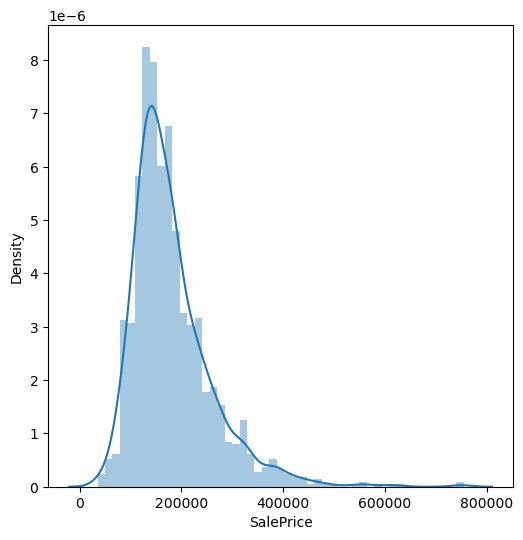

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(housing['SalePrice'])

In [23]:
housing['SalePrice'].skew()

1.8828757597682129

In [24]:
housing['SalePrice'].kurt()

6.536281860064529

In [25]:
housing["SalePrice"] = np.log(housing["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

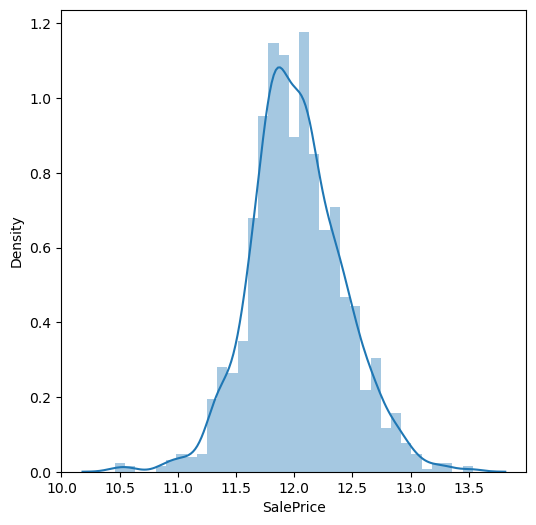

In [26]:
plt.figure(figsize=(6,6))
sns.distplot(housing['SalePrice'])

In [27]:
housing['SalePrice'].skew()

0.12133506220520406

In [28]:
housing['SalePrice'].kurt()

0.8095319958036296

In [33]:
if 'Id' in housing.columns:
    housing.drop("Id", axis=1, inplace=True)

In [35]:
housing[['MSSubClass','OverallQual', 'OverallCond']] = \
   housing[['MSSubClass','OverallQual', 'OverallCond']].astype('object')

In [36]:
housing[ 'LotFrontage'] = pd.to_numeric(housing['LotFrontage'],errors = 'coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors = 'coerce')

In [37]:
housing.isnull().sum()/housing.shape[0] *100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [38]:
null_cols = housing.columns[housing.isnull().any()]
null_cols

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtFinType1', 'Electrical',
       'GarageYrBlt'],
      dtype='object')

In [39]:
for feature in null_cols:
    if housing[feature].dtype == np.float64 or housing[feature].dtype == np.int64:
        housing[feature].fillna(housing[feature].mean(), inplace = True)
    else:
        housing[feature].fillna(housing[feature].mode()[0], inplace = True)    

In [40]:
housing.isnull().any().sum()

0

In [41]:
cat_cols = housing.select_dtypes(include='object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
num_cols = housing.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

LotFrontage


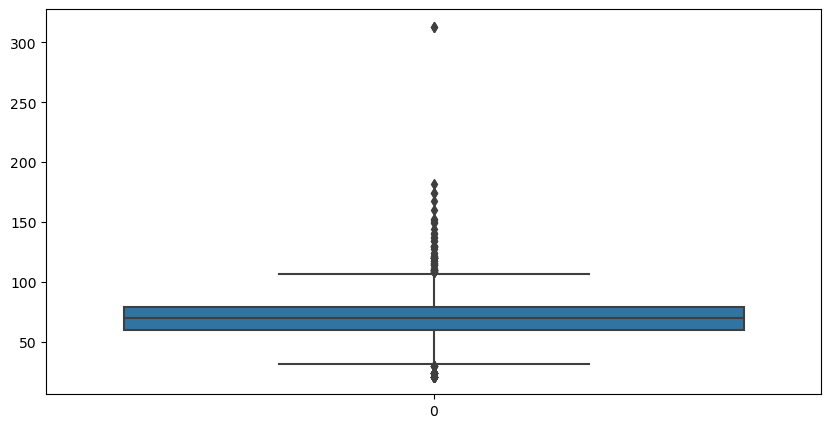

LotArea


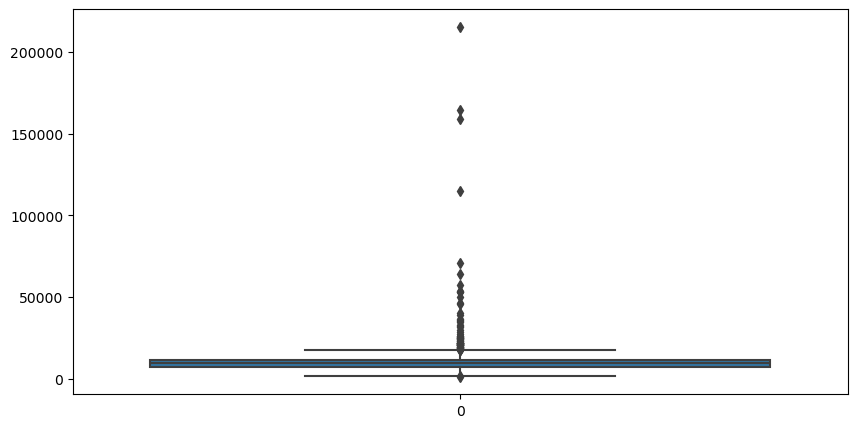

YearBuilt


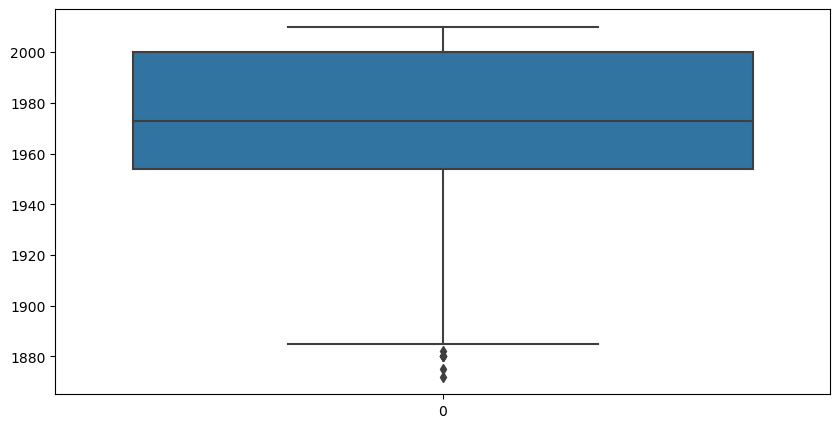

YearRemodAdd


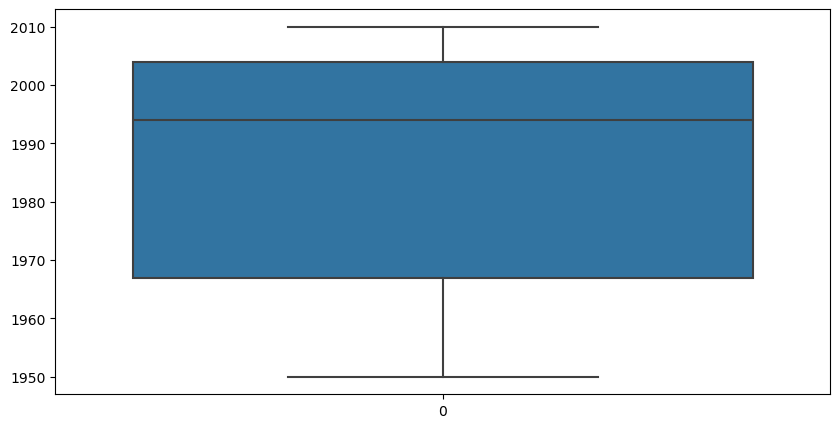

MasVnrArea


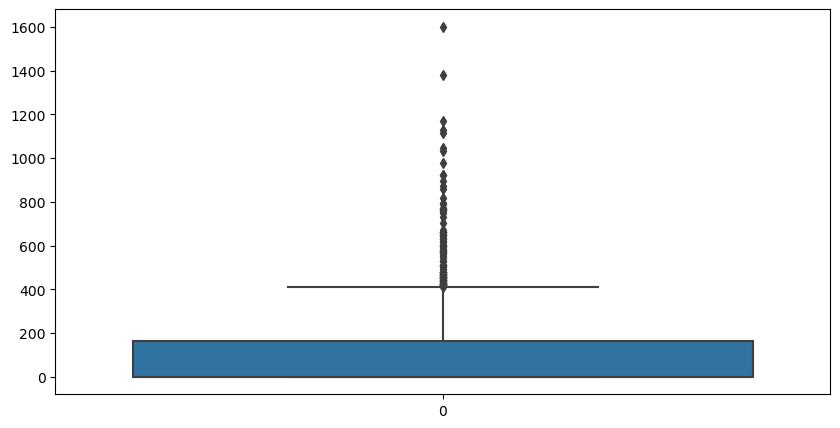

BsmtFinSF1


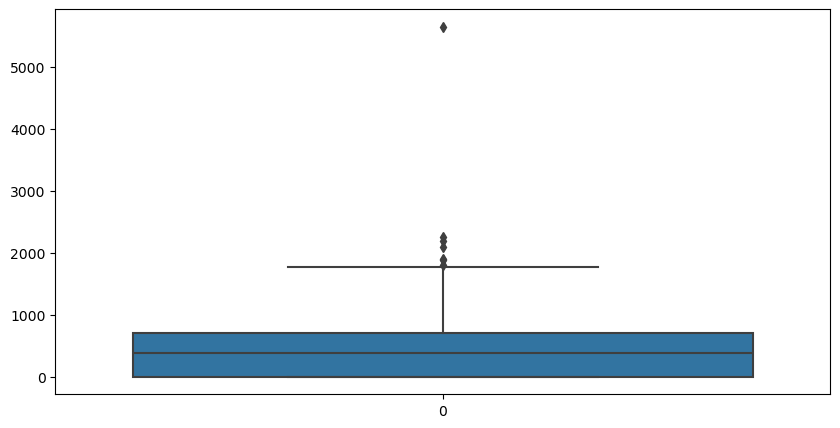

BsmtFinSF2


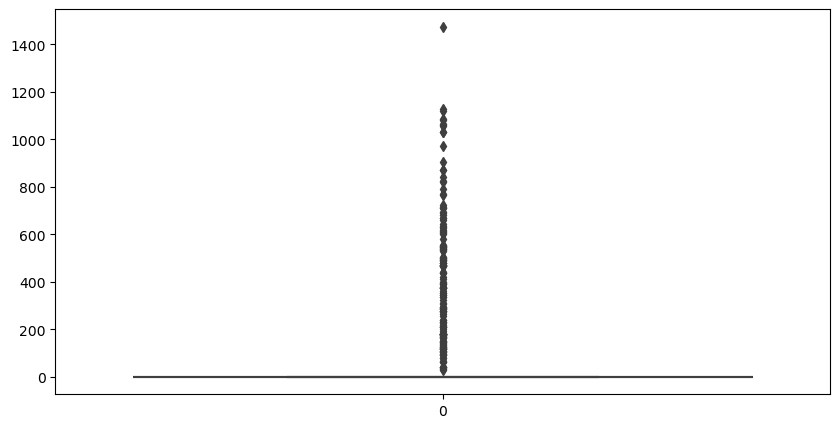

BsmtUnfSF


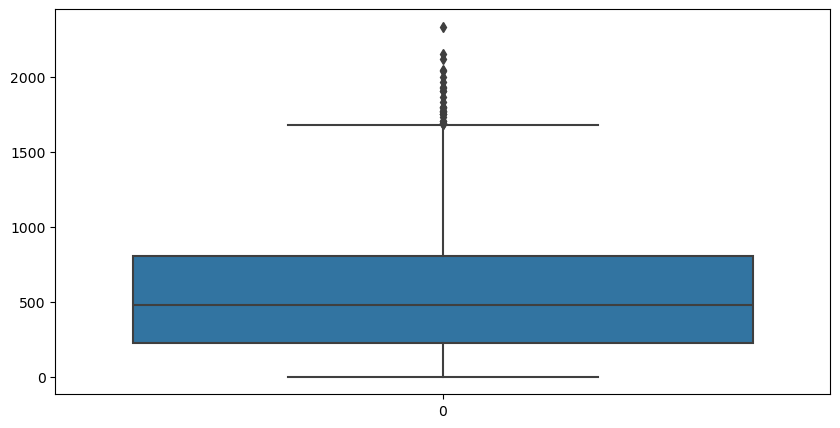

TotalBsmtSF


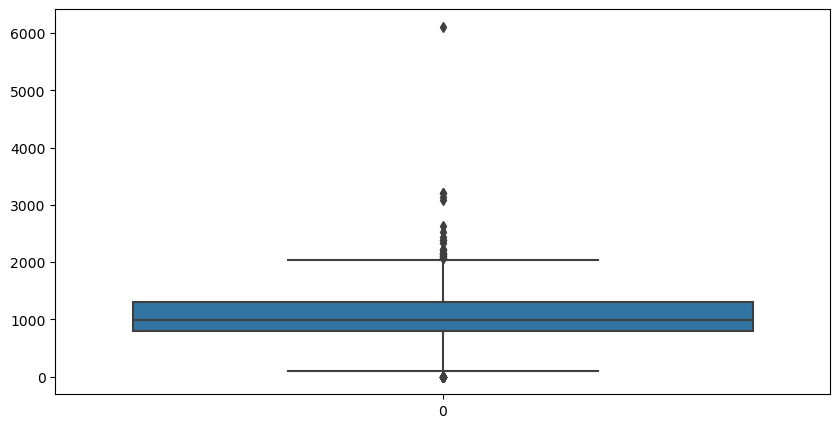

1stFlrSF


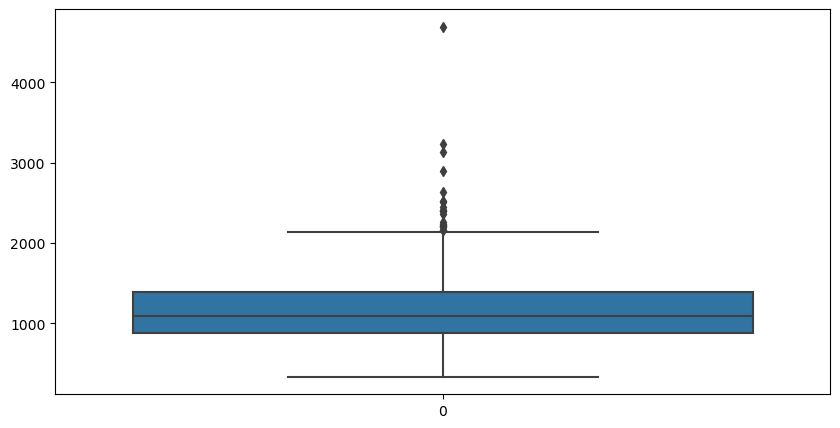

2ndFlrSF


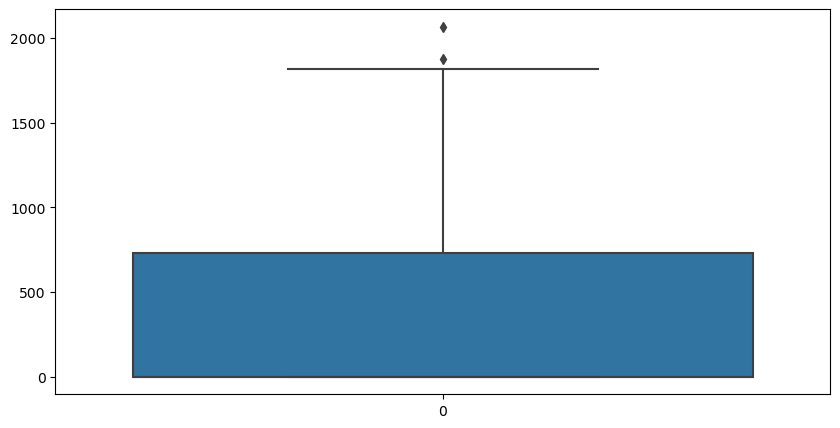

LowQualFinSF


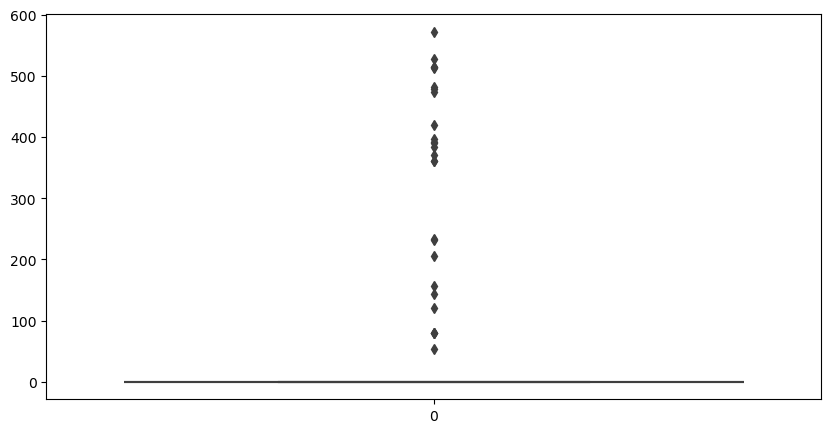

GrLivArea


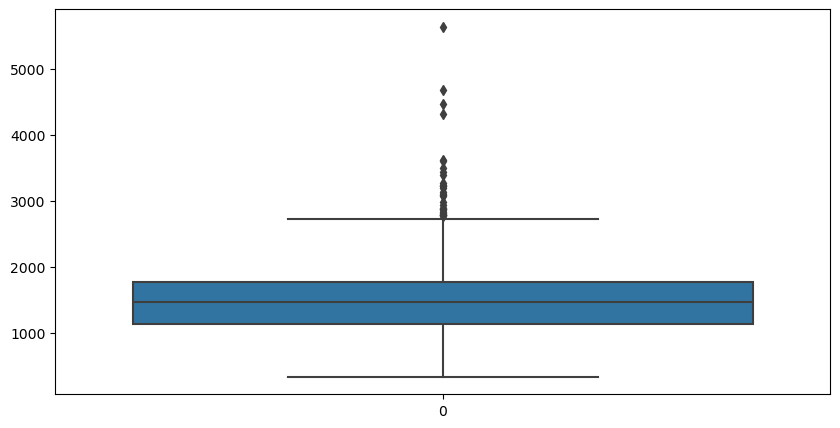

BsmtFullBath


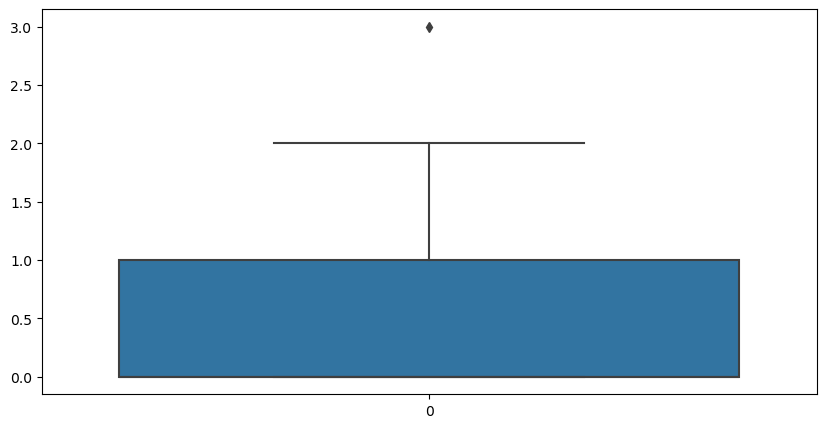

BsmtHalfBath


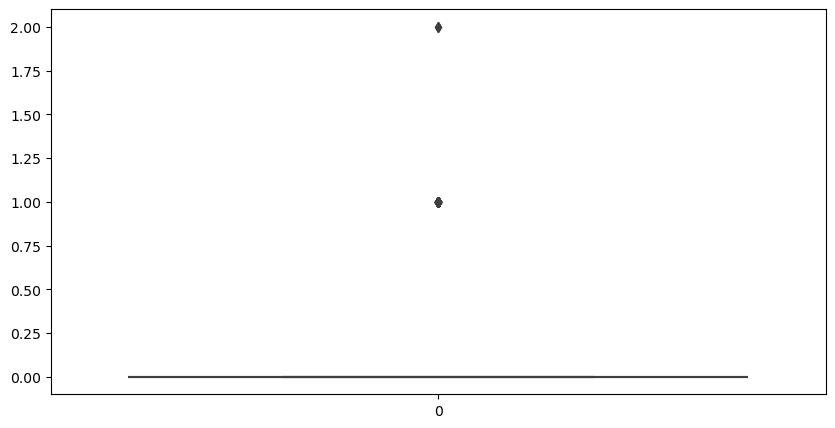

FullBath


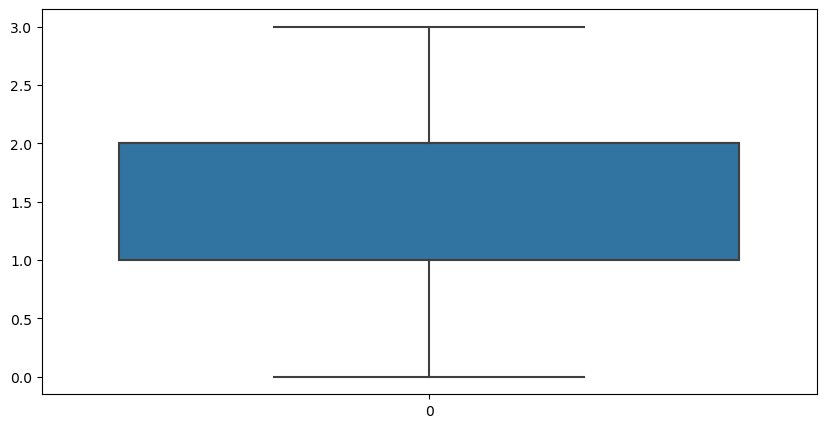

HalfBath


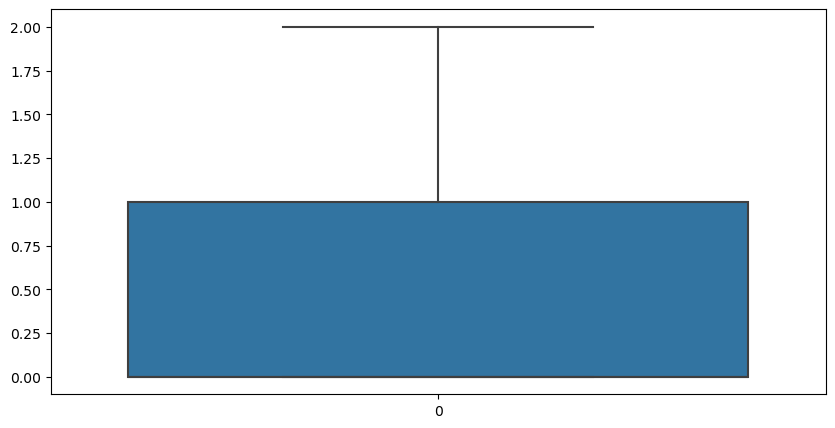

BedroomAbvGr


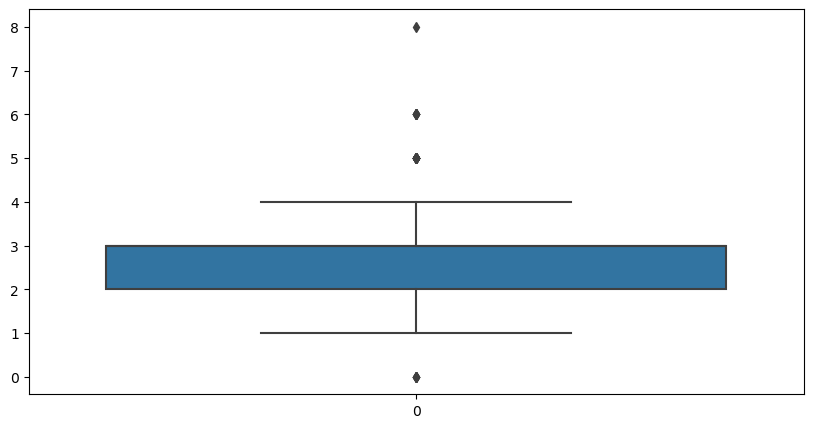

KitchenAbvGr


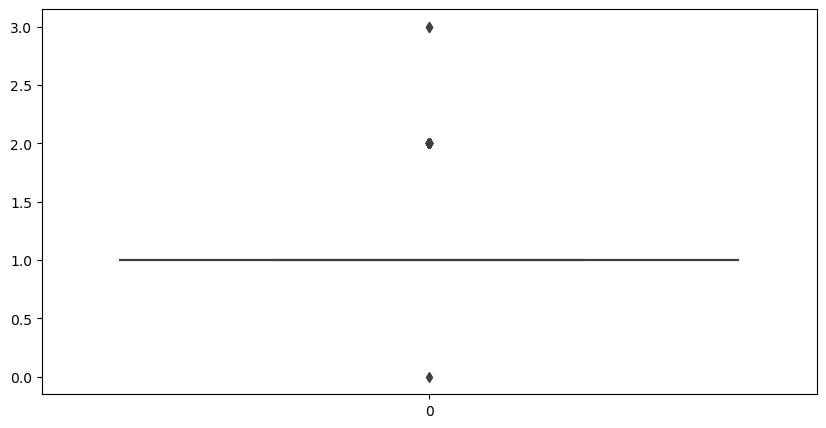

TotRmsAbvGrd


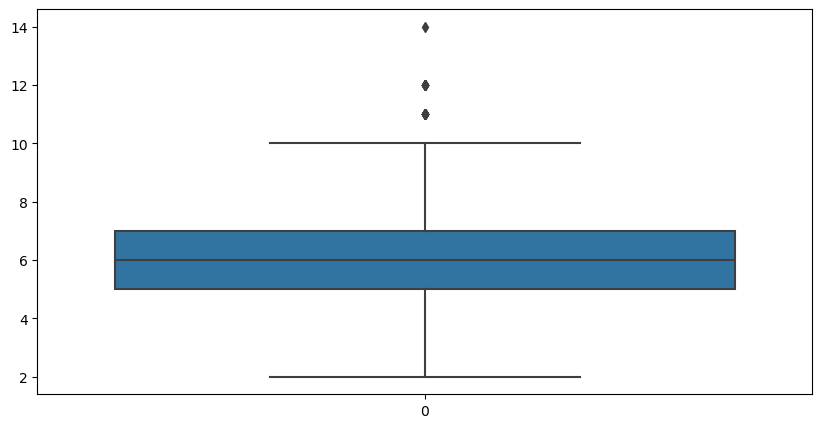

Fireplaces


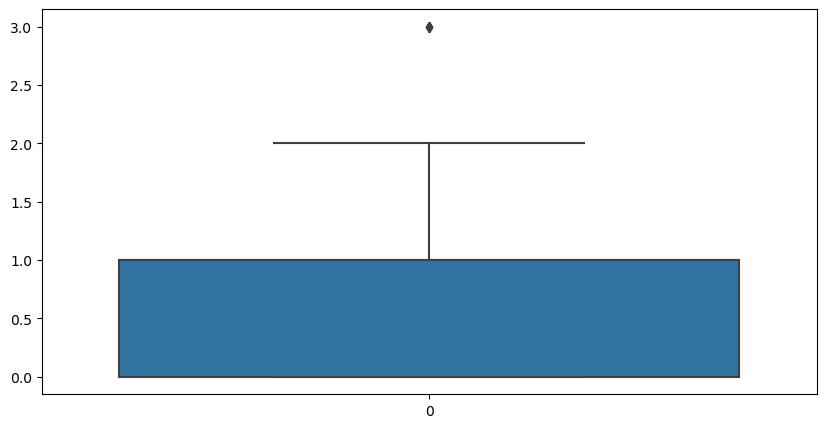

GarageYrBlt


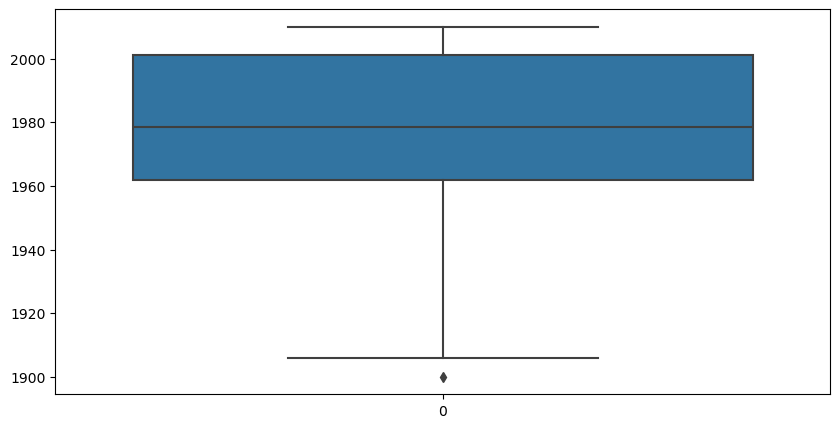

GarageCars


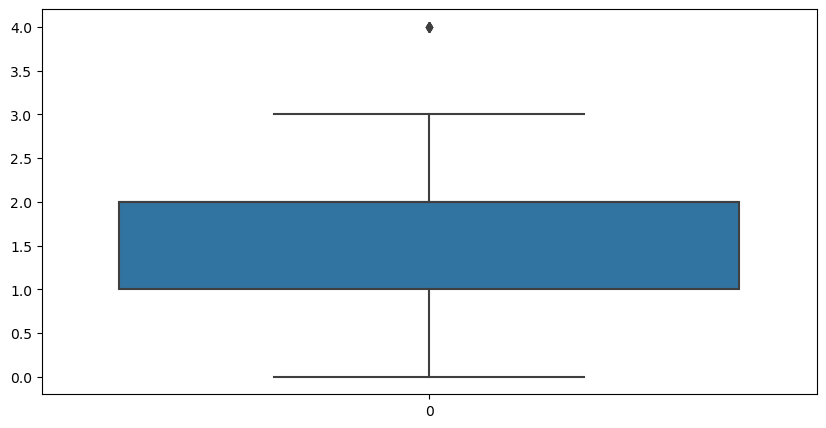

GarageArea


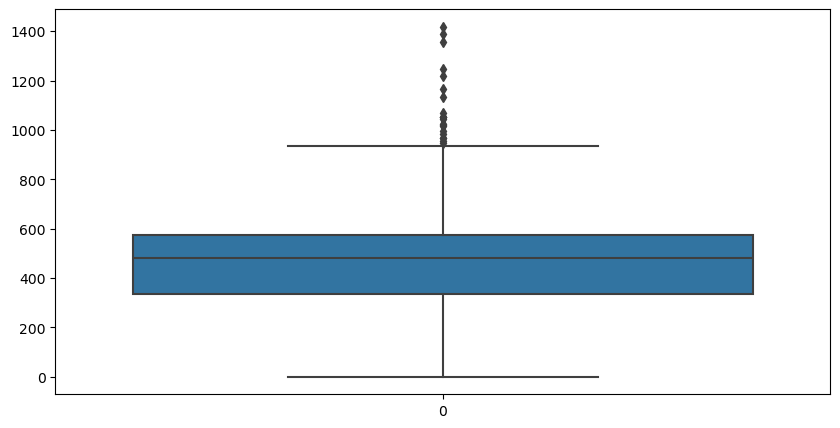

WoodDeckSF


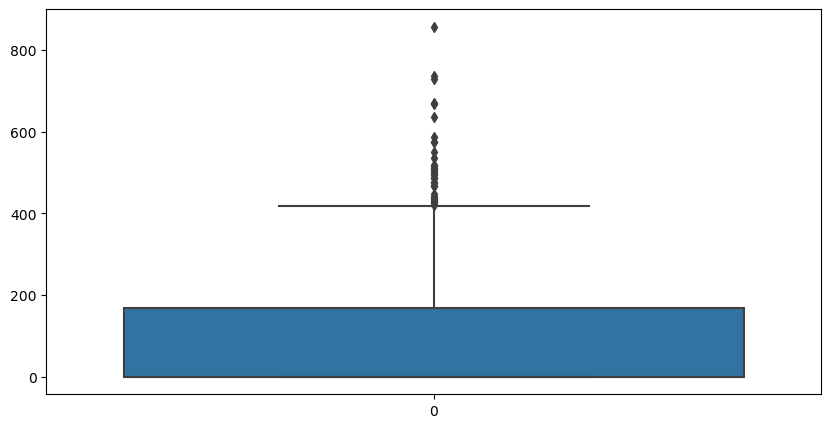

OpenPorchSF


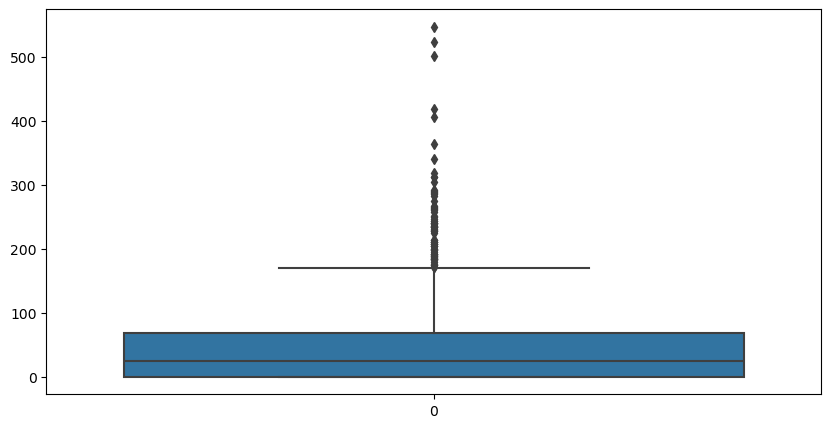

EnclosedPorch


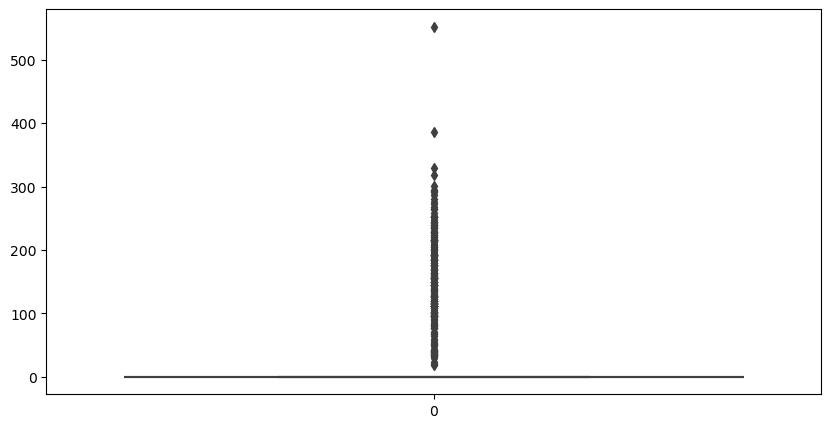

3SsnPorch


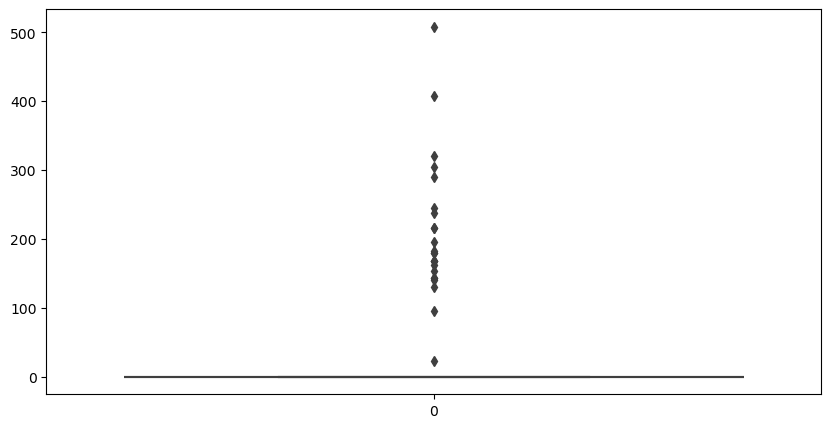

ScreenPorch


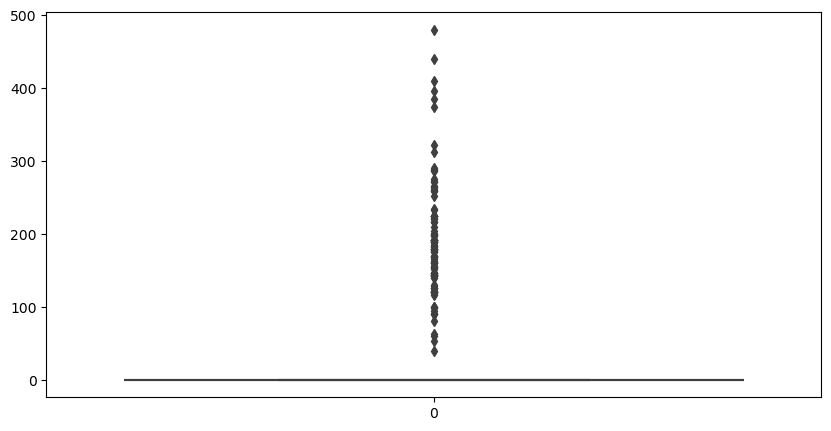

PoolArea


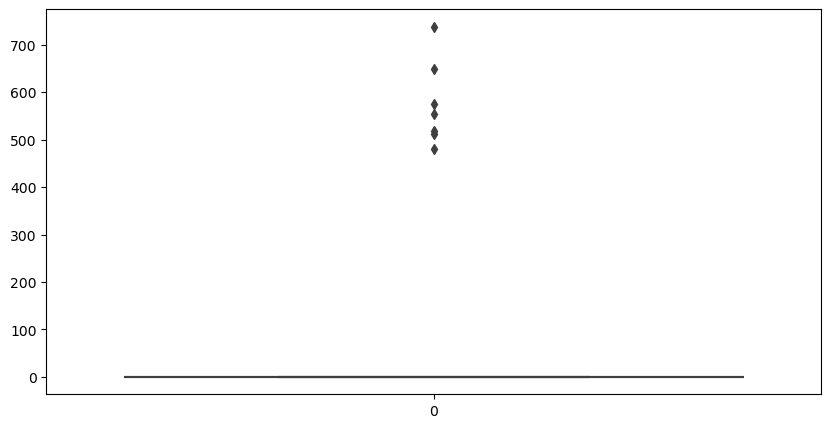

MiscVal


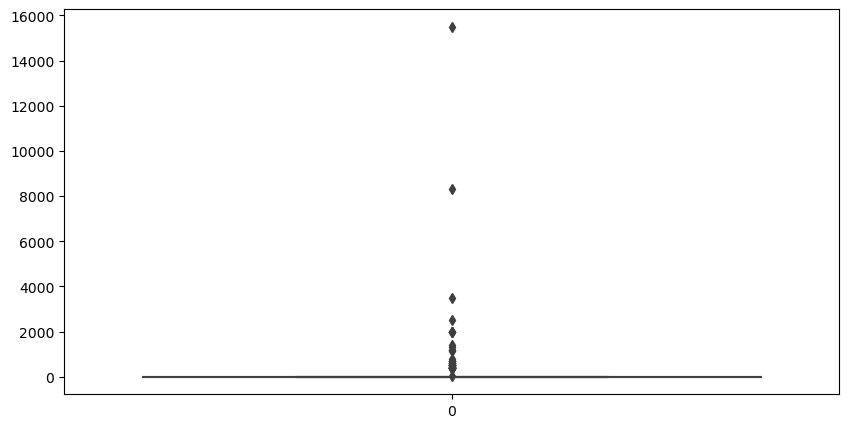

MoSold


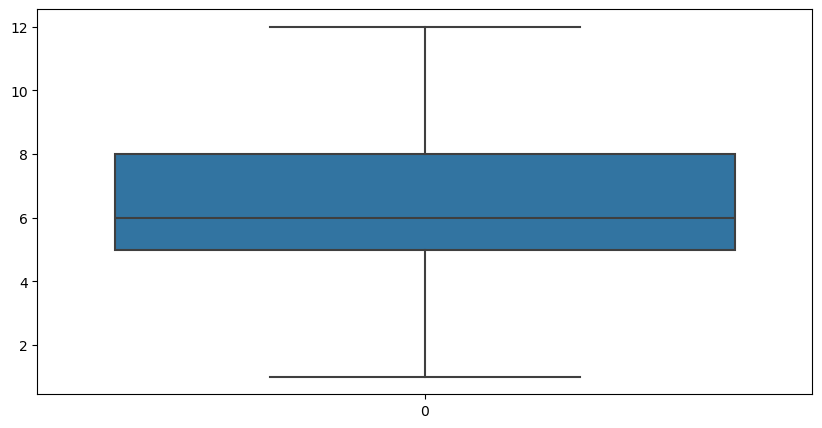

YrSold


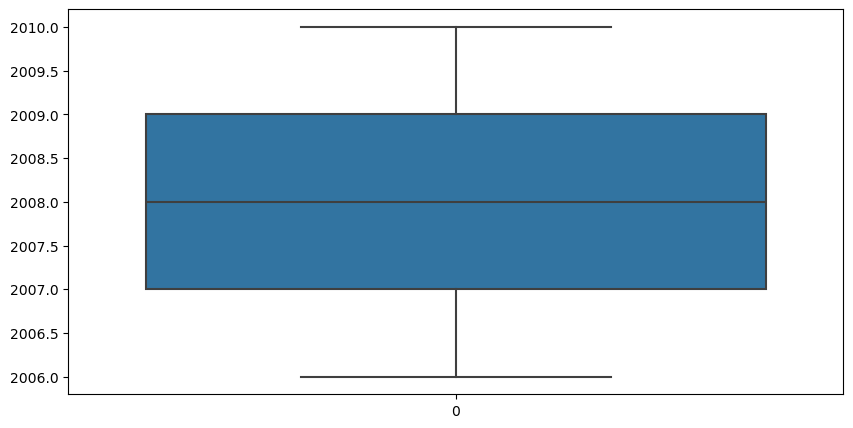

SalePrice


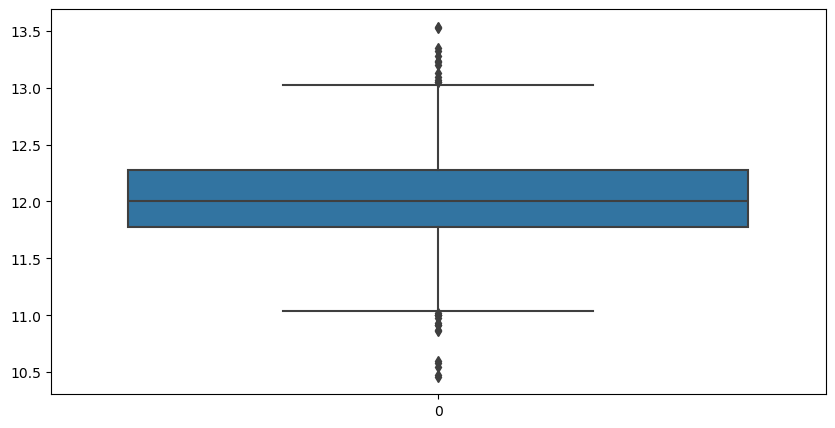

In [43]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    print(col)
    sns.boxplot(housing[col])
    plt.show()

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64


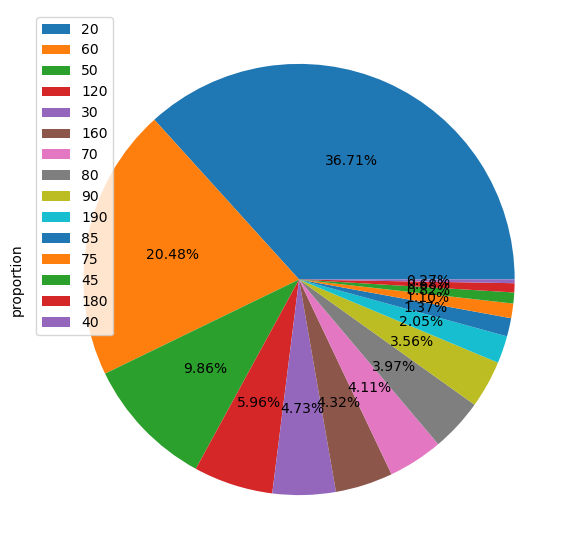

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64


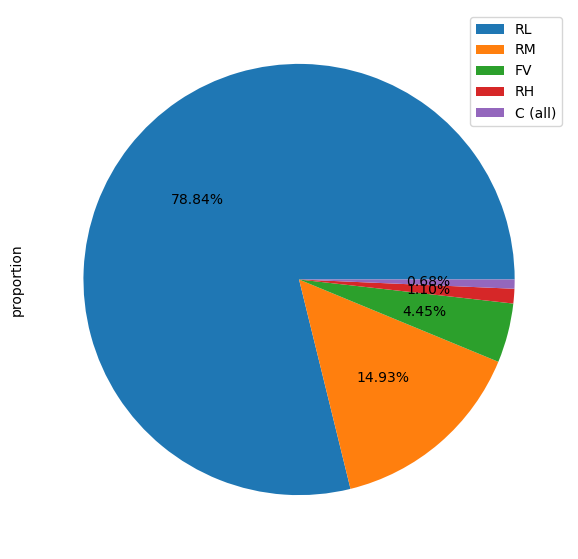

Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64


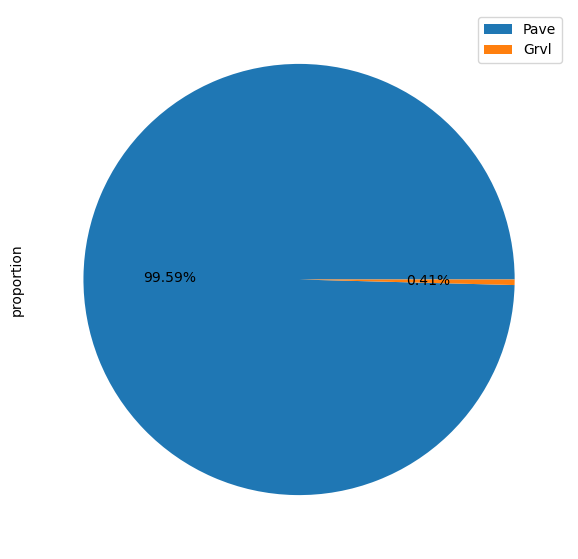

Alley
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: proportion, dtype: float64


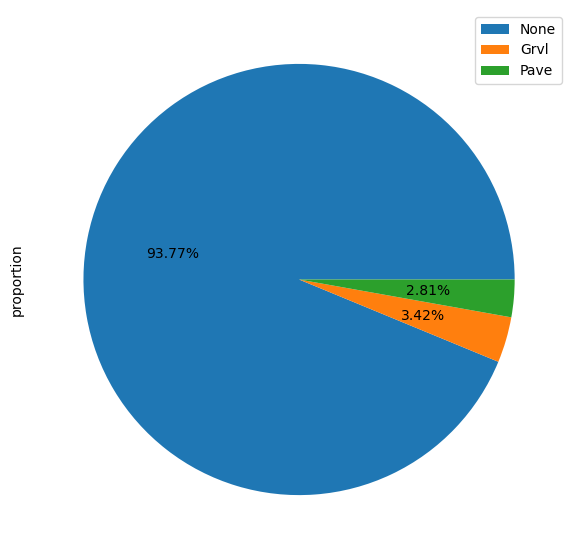

LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64


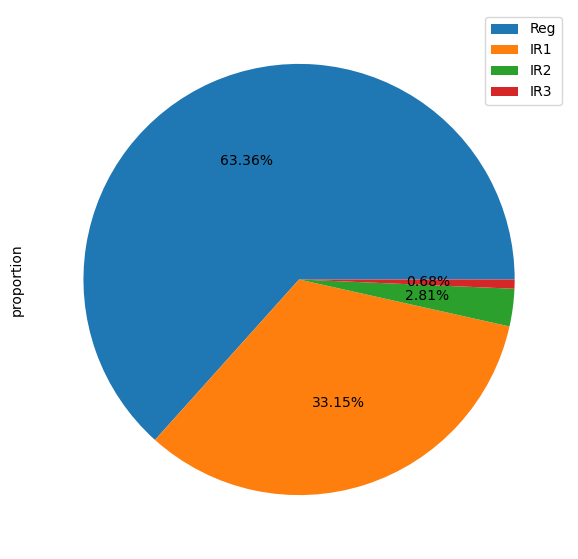

LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64


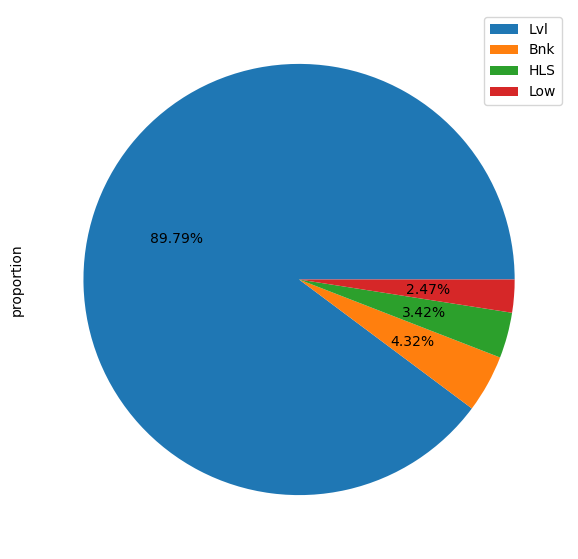

Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64


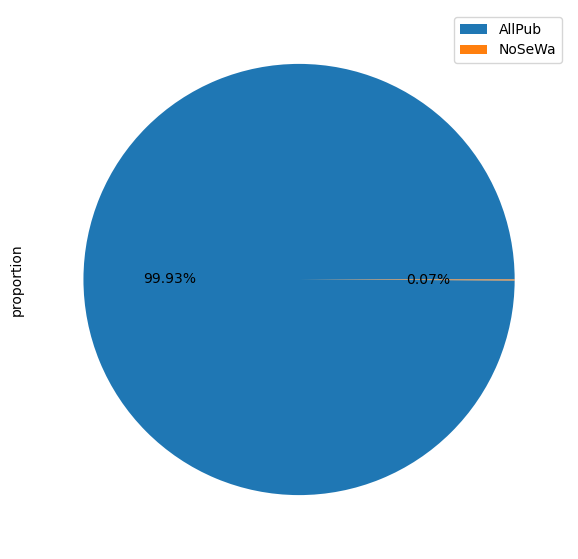

LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64


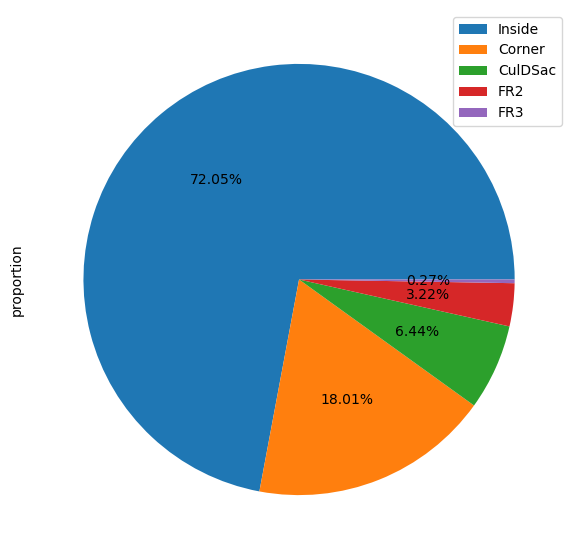

LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64


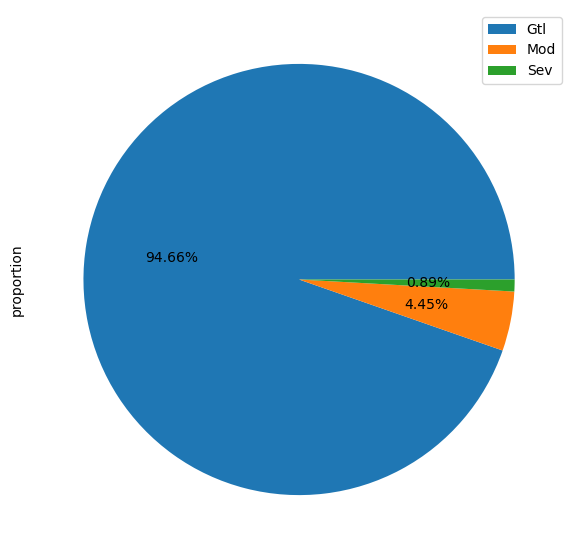

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64


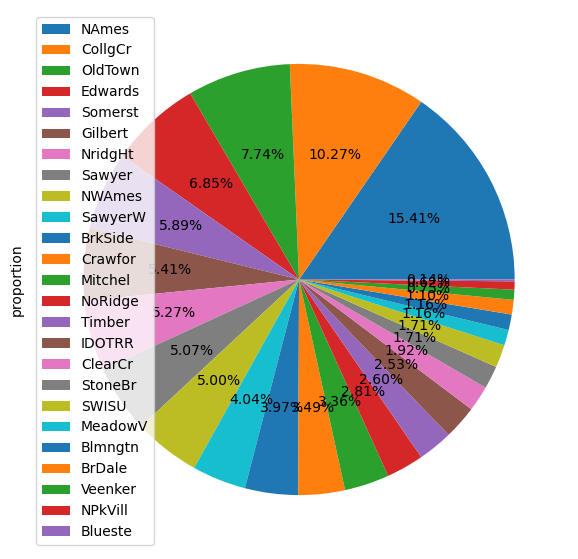

Condition1
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: proportion, dtype: float64


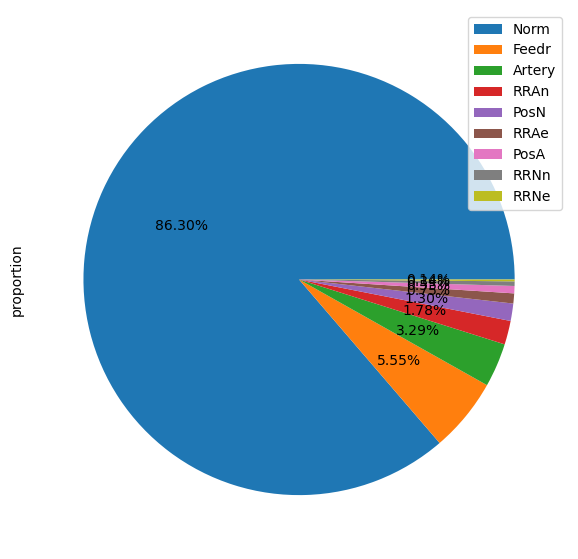

Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: proportion, dtype: float64


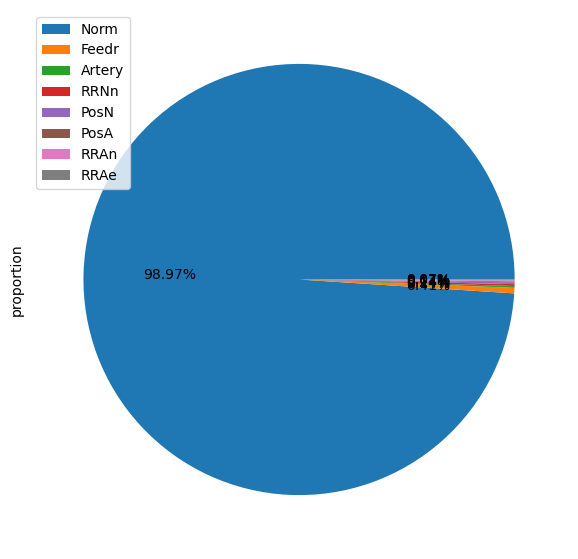

BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: proportion, dtype: float64


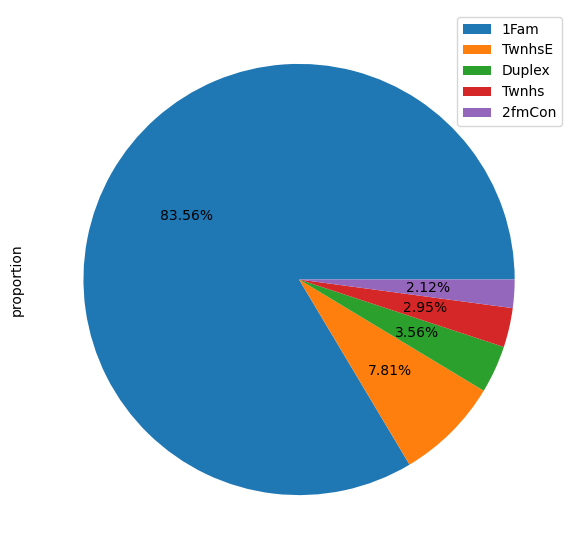

HouseStyle
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: proportion, dtype: float64


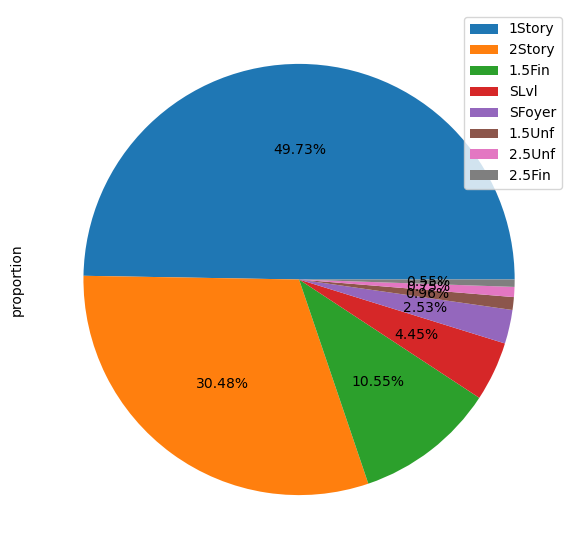

OverallQual
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: proportion, dtype: float64


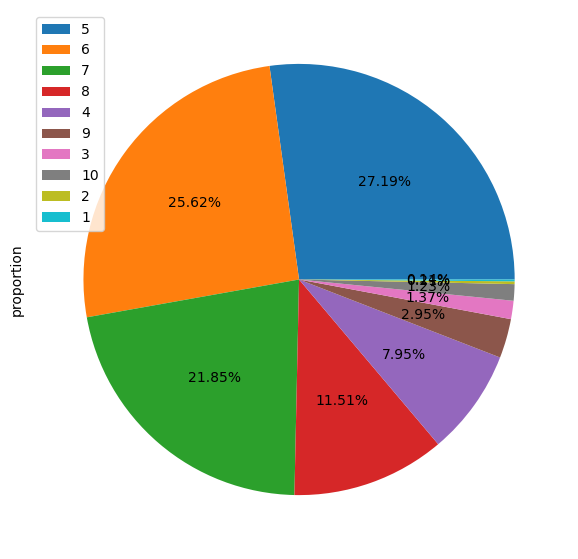

OverallCond
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: proportion, dtype: float64


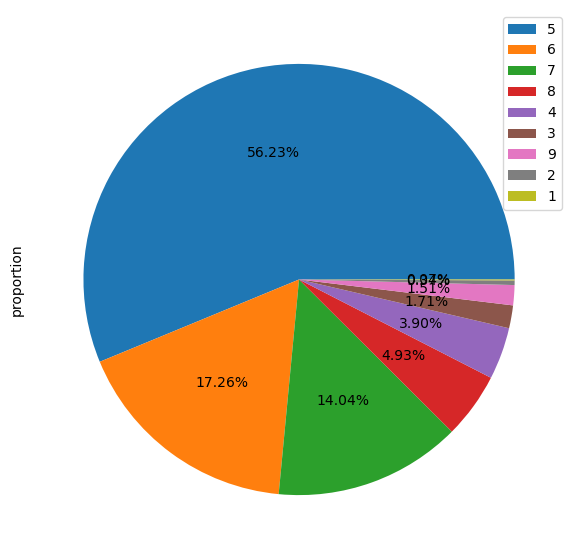

RoofStyle
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: proportion, dtype: float64


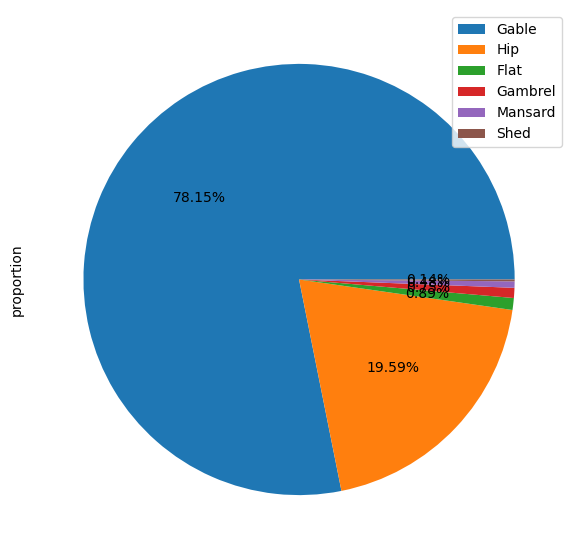

RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: proportion, dtype: float64


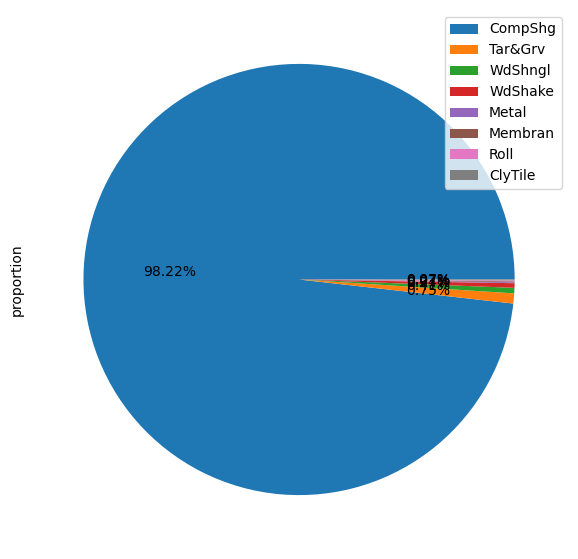

Exterior1st
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: proportion, dtype: float64


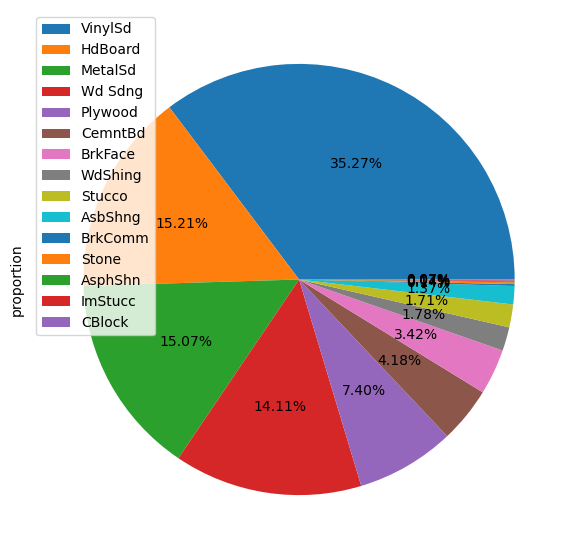

Exterior2nd
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: proportion, dtype: float64


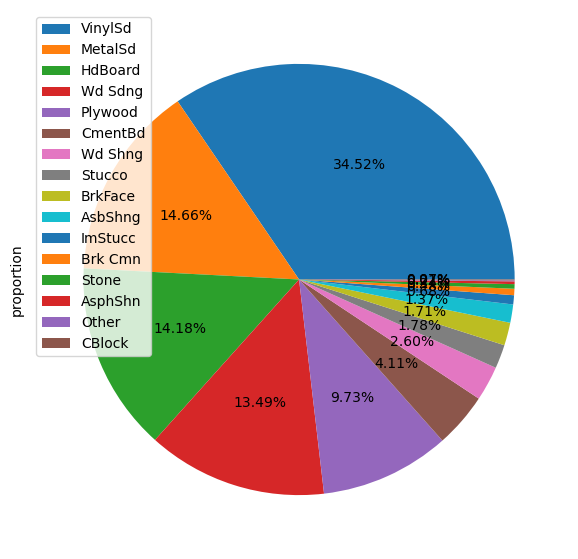

MasVnrType
BrkFace    0.902055
Stone      0.087671
BrkCmn     0.010274
Name: proportion, dtype: float64


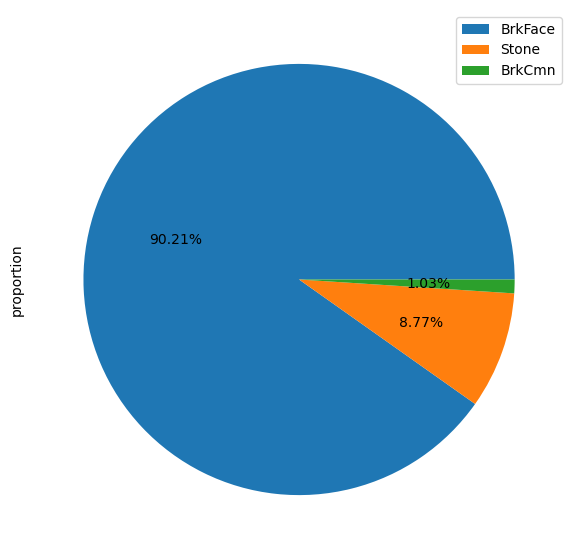

ExterQual
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: proportion, dtype: float64


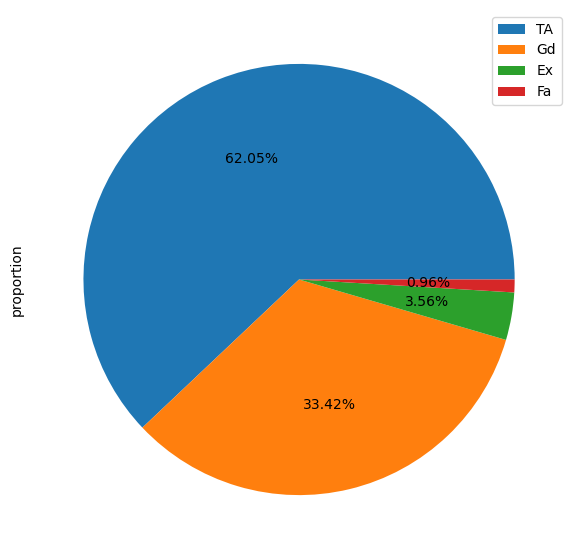

ExterCond
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: proportion, dtype: float64


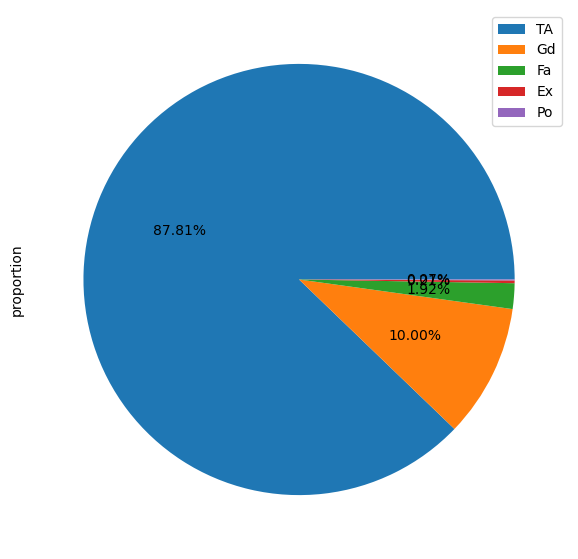

Foundation
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: proportion, dtype: float64


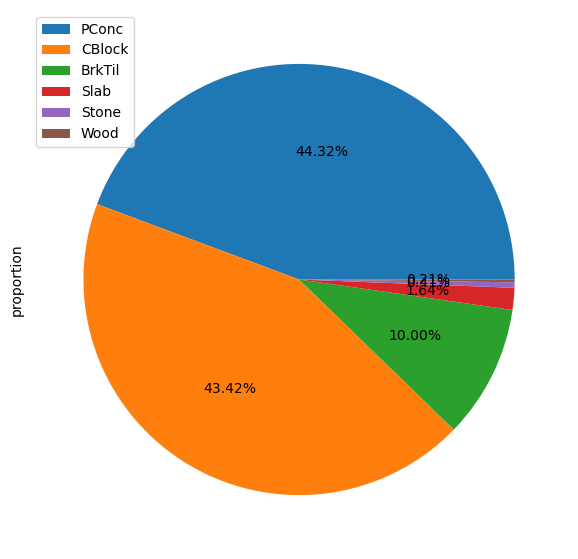

BsmtQual
TA      0.444521
Gd      0.423288
Ex      0.082877
None    0.025342
Fa      0.023973
Name: proportion, dtype: float64


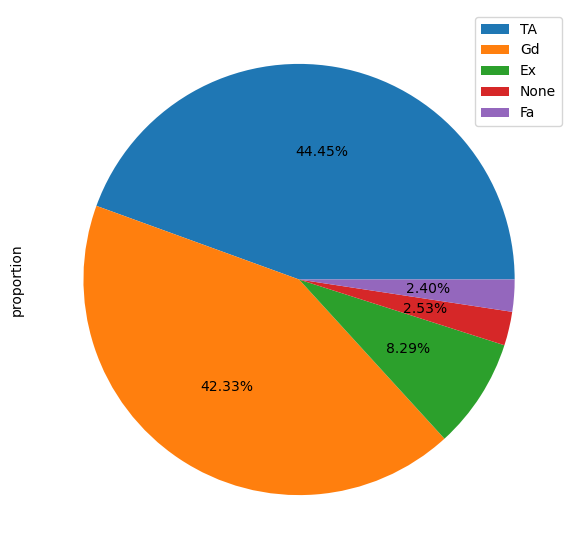

BsmtCond
TA      0.897945
Gd      0.044521
Fa      0.030822
None    0.025342
Po      0.001370
Name: proportion, dtype: float64


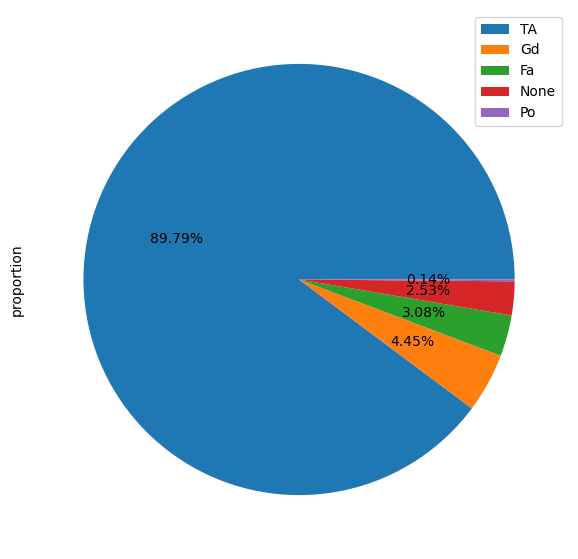

BsmtExposure
No      0.652740
Av      0.151370
Gd      0.091781
Mn      0.078082
None    0.026027
Name: proportion, dtype: float64


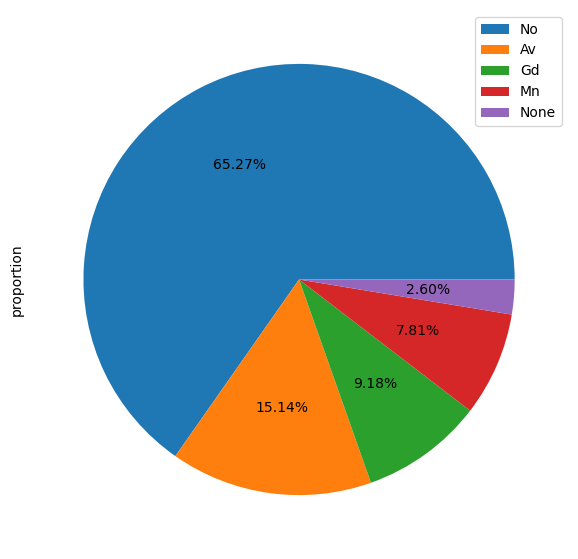

BsmtFinType1
Unf    0.319863
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: proportion, dtype: float64


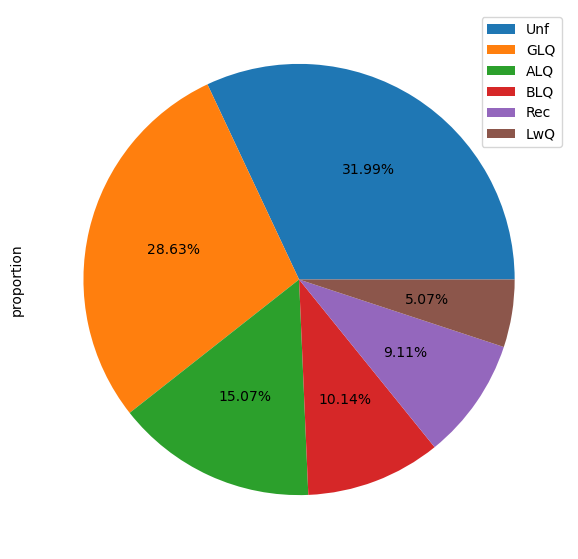

BsmtFinType2
Unf     0.860274
Rec     0.036986
LwQ     0.031507
None    0.026027
BLQ     0.022603
ALQ     0.013014
GLQ     0.009589
Name: proportion, dtype: float64


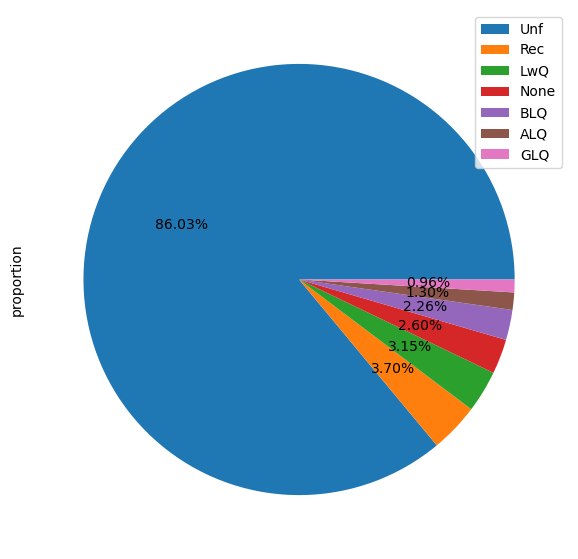

Heating
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: proportion, dtype: float64


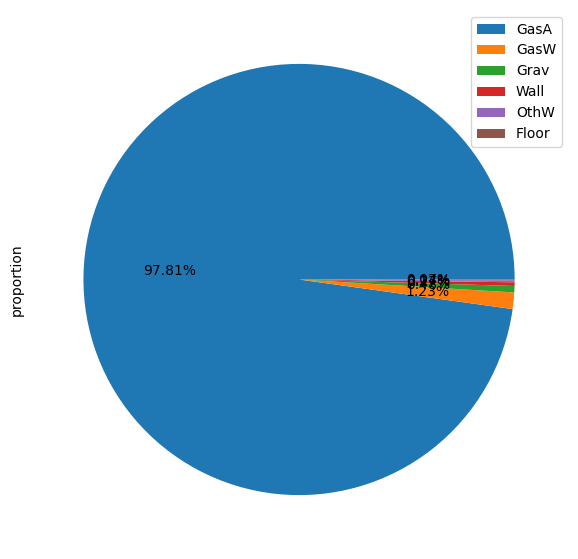

HeatingQC
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: proportion, dtype: float64


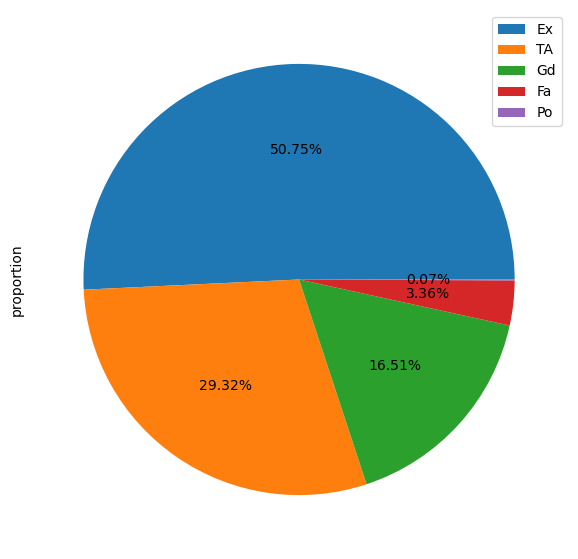

CentralAir
Y    0.934932
N    0.065068
Name: proportion, dtype: float64


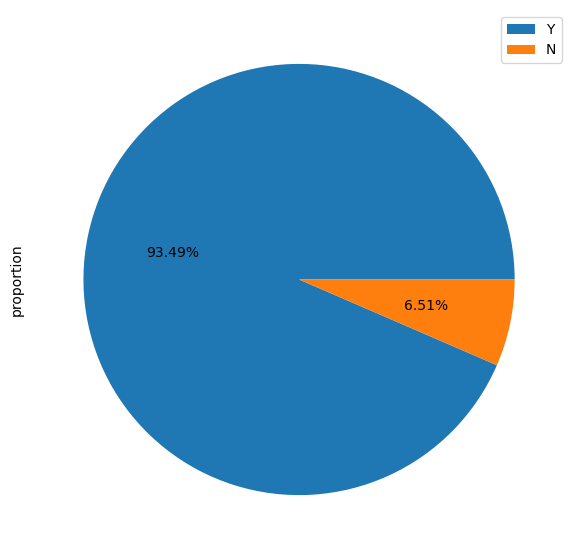

Electrical
SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: proportion, dtype: float64


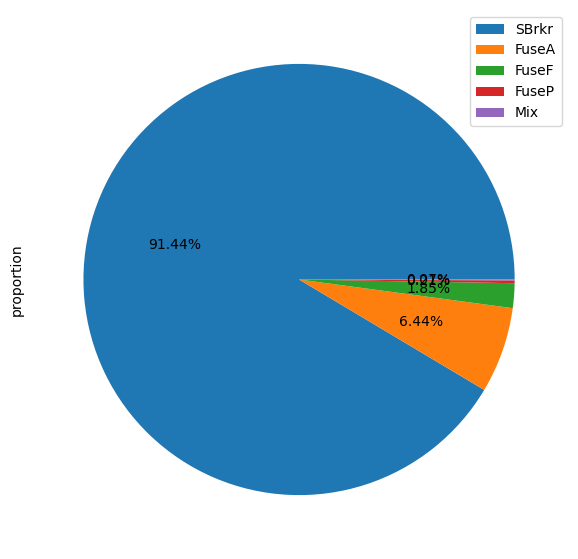

KitchenQual
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: proportion, dtype: float64


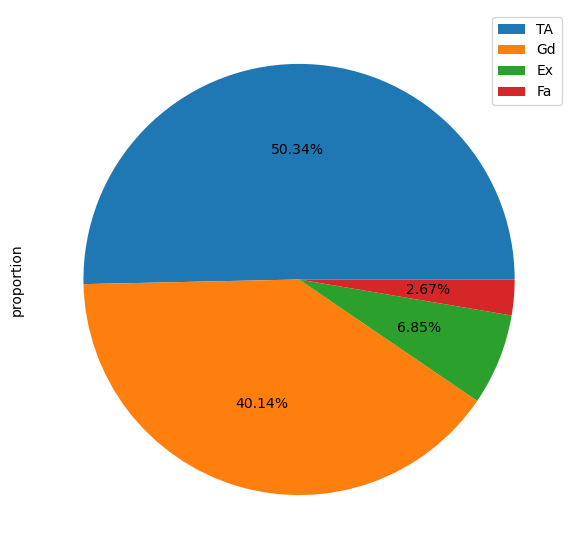

Functional
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: proportion, dtype: float64


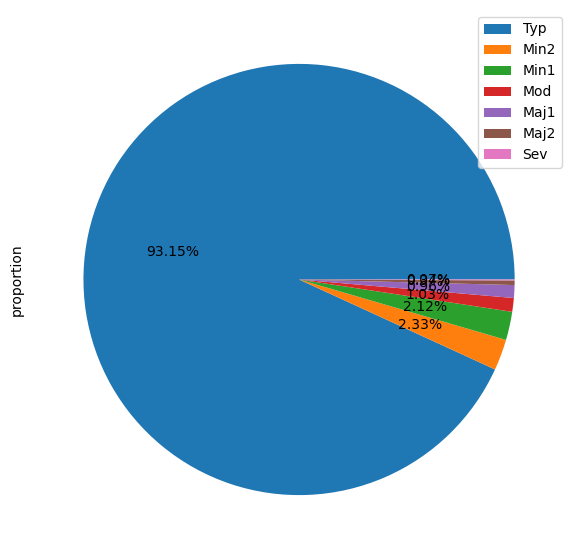

FireplaceQu
None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: proportion, dtype: float64


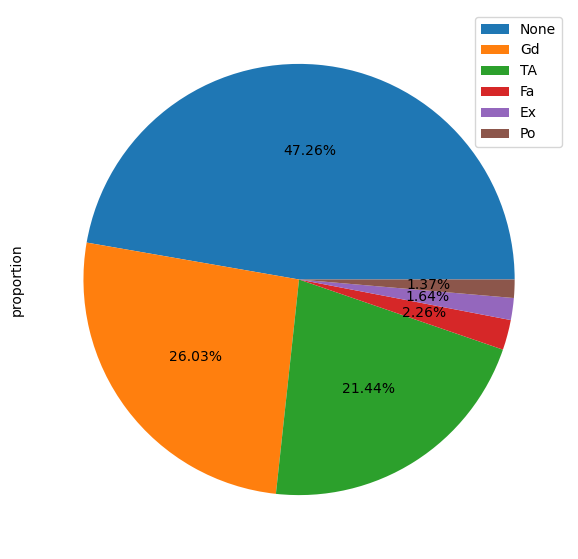

GarageType
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
None       0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: proportion, dtype: float64


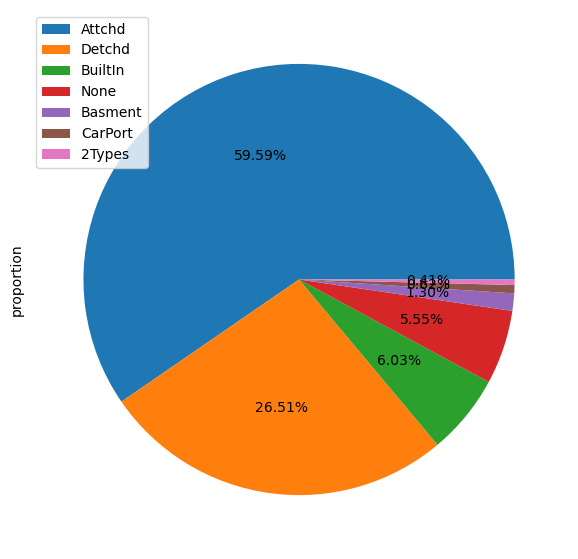

GarageFinish
Unf     0.414384
RFn     0.289041
Fin     0.241096
None    0.055479
Name: proportion, dtype: float64


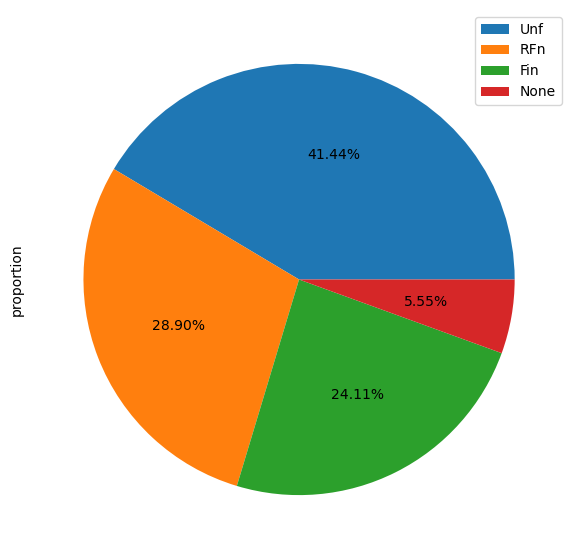

GarageQual
TA      0.897945
None    0.055479
Fa      0.032877
Gd      0.009589
Ex      0.002055
Po      0.002055
Name: proportion, dtype: float64


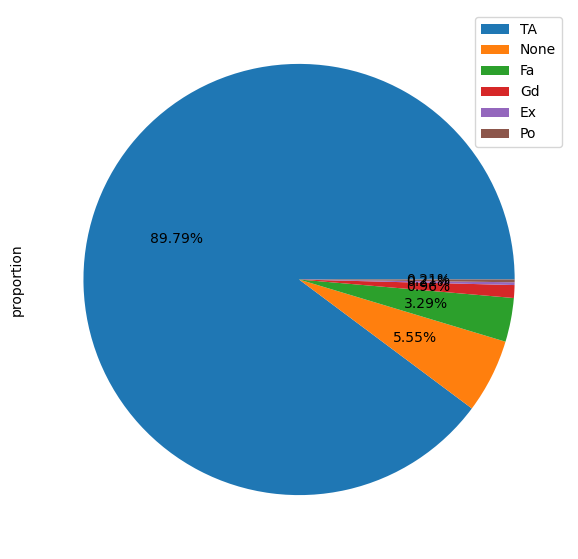

GarageCond
TA      0.908219
None    0.055479
Fa      0.023973
Gd      0.006164
Po      0.004795
Ex      0.001370
Name: proportion, dtype: float64


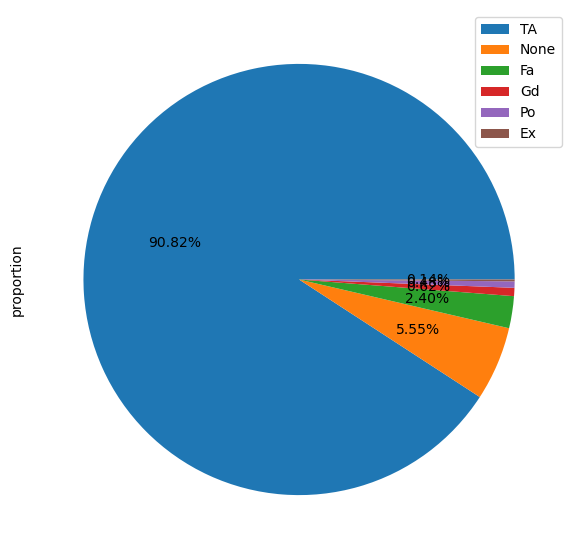

PavedDrive
Y    0.917808
N    0.061644
P    0.020548
Name: proportion, dtype: float64


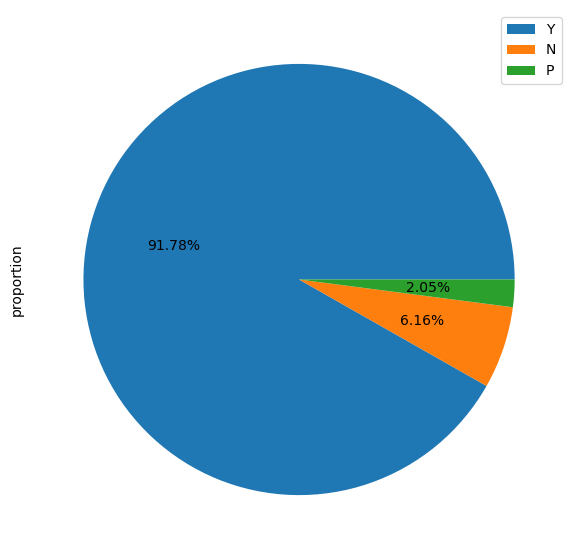

PoolQC
None    0.995205
Gd      0.002055
Ex      0.001370
Fa      0.001370
Name: proportion, dtype: float64


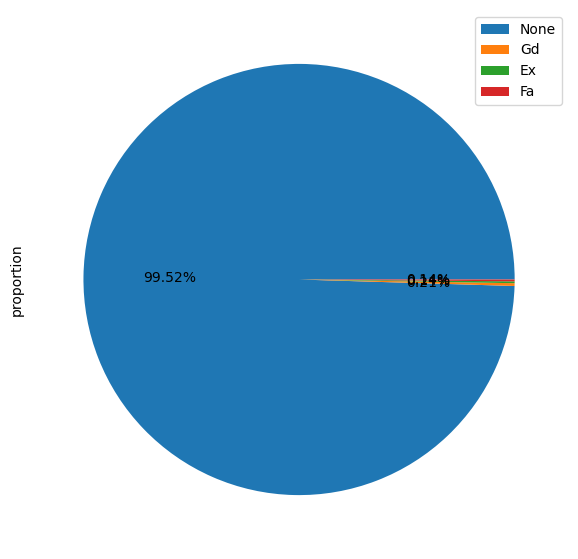

Fence
None     0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: proportion, dtype: float64


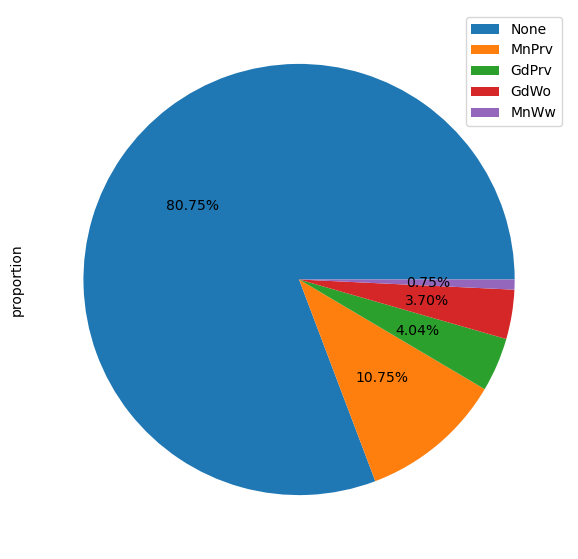

MiscFeature
None    0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: proportion, dtype: float64


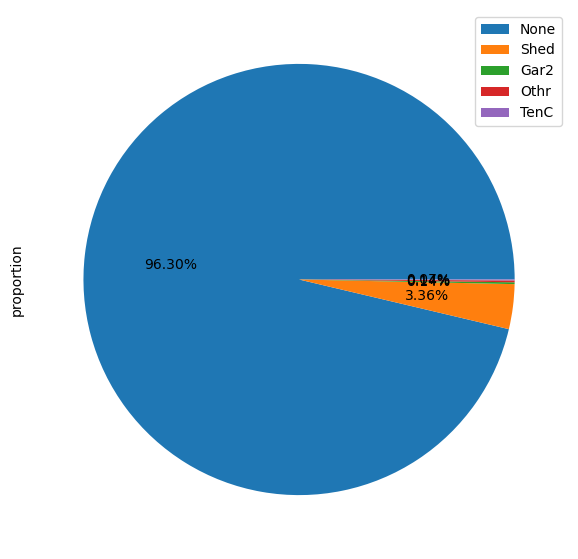

SaleType
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: proportion, dtype: float64


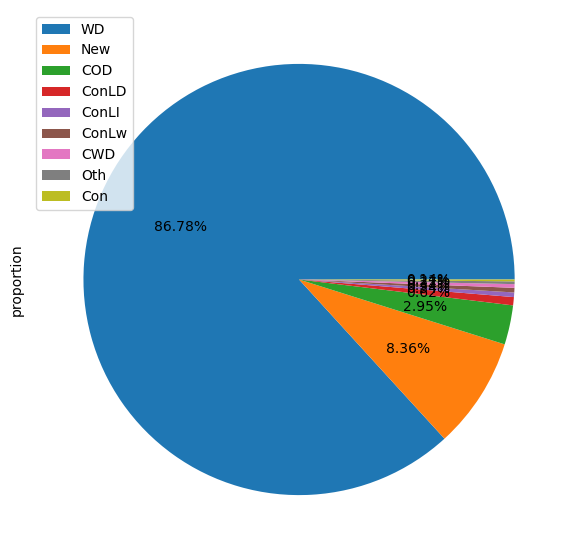

SaleCondition
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: proportion, dtype: float64


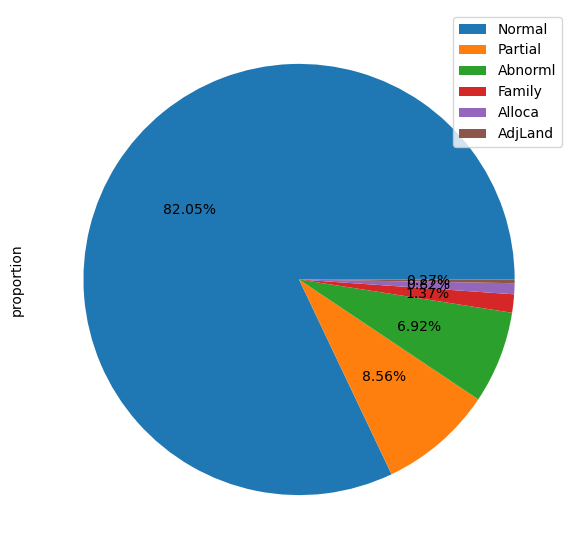

In [44]:
for col in cat_cols:
    print(housing[col].value_counts(normalize=True))
    plt.figure(figsize=(7,7))
    housing[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct='%1.2f%%')
    plt.legend()
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

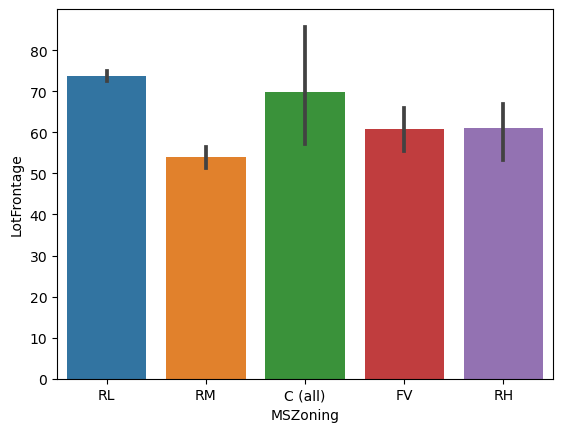

In [45]:
sns.barplot(x = "MSZoning", y = "LotFrontage", data = housing)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

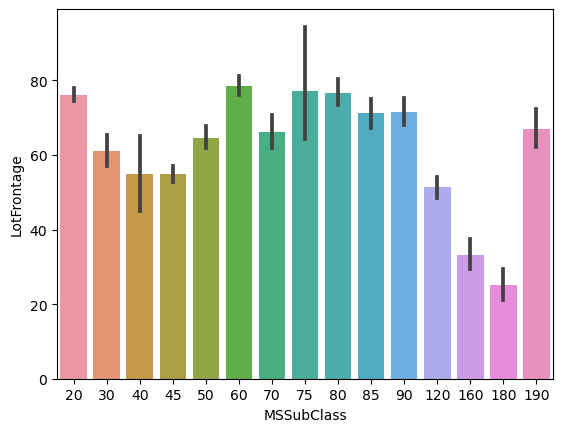

In [46]:
sns.barplot(x = "MSSubClass", y = "LotFrontage", data = housing)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

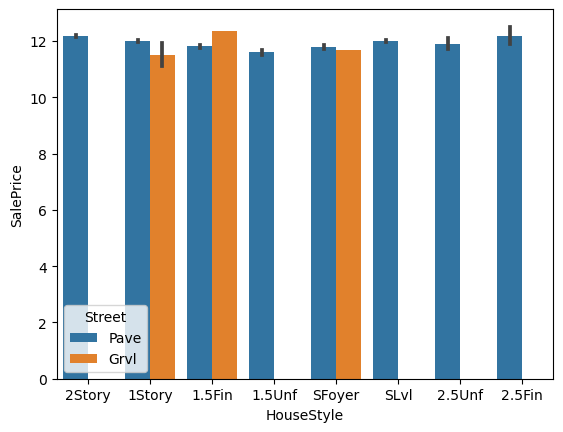

In [47]:
sns.barplot(x = "HouseStyle", y = "SalePrice", hue = "Street", data = housing)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

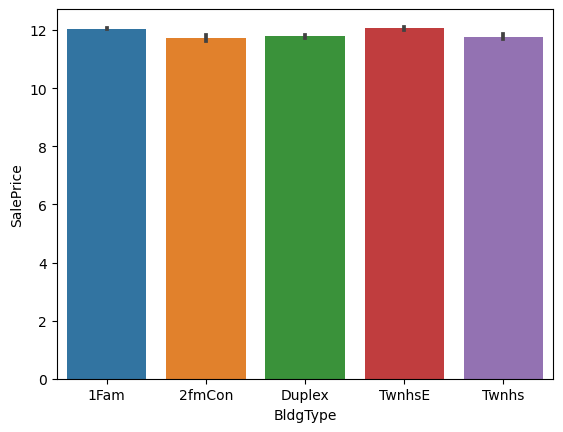

In [48]:
sns.barplot(x = "BldgType", y = "SalePrice", data = housing)
plt.show

In [49]:
housing["Age"] = housing["YrSold"] = housing["YearBuilt"]
housing["Age"].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: Age, dtype: int64

In [50]:
housing.drop(columns=["YearBuilt","YrSold"], axis=1, inplace=True)

<Axes: >

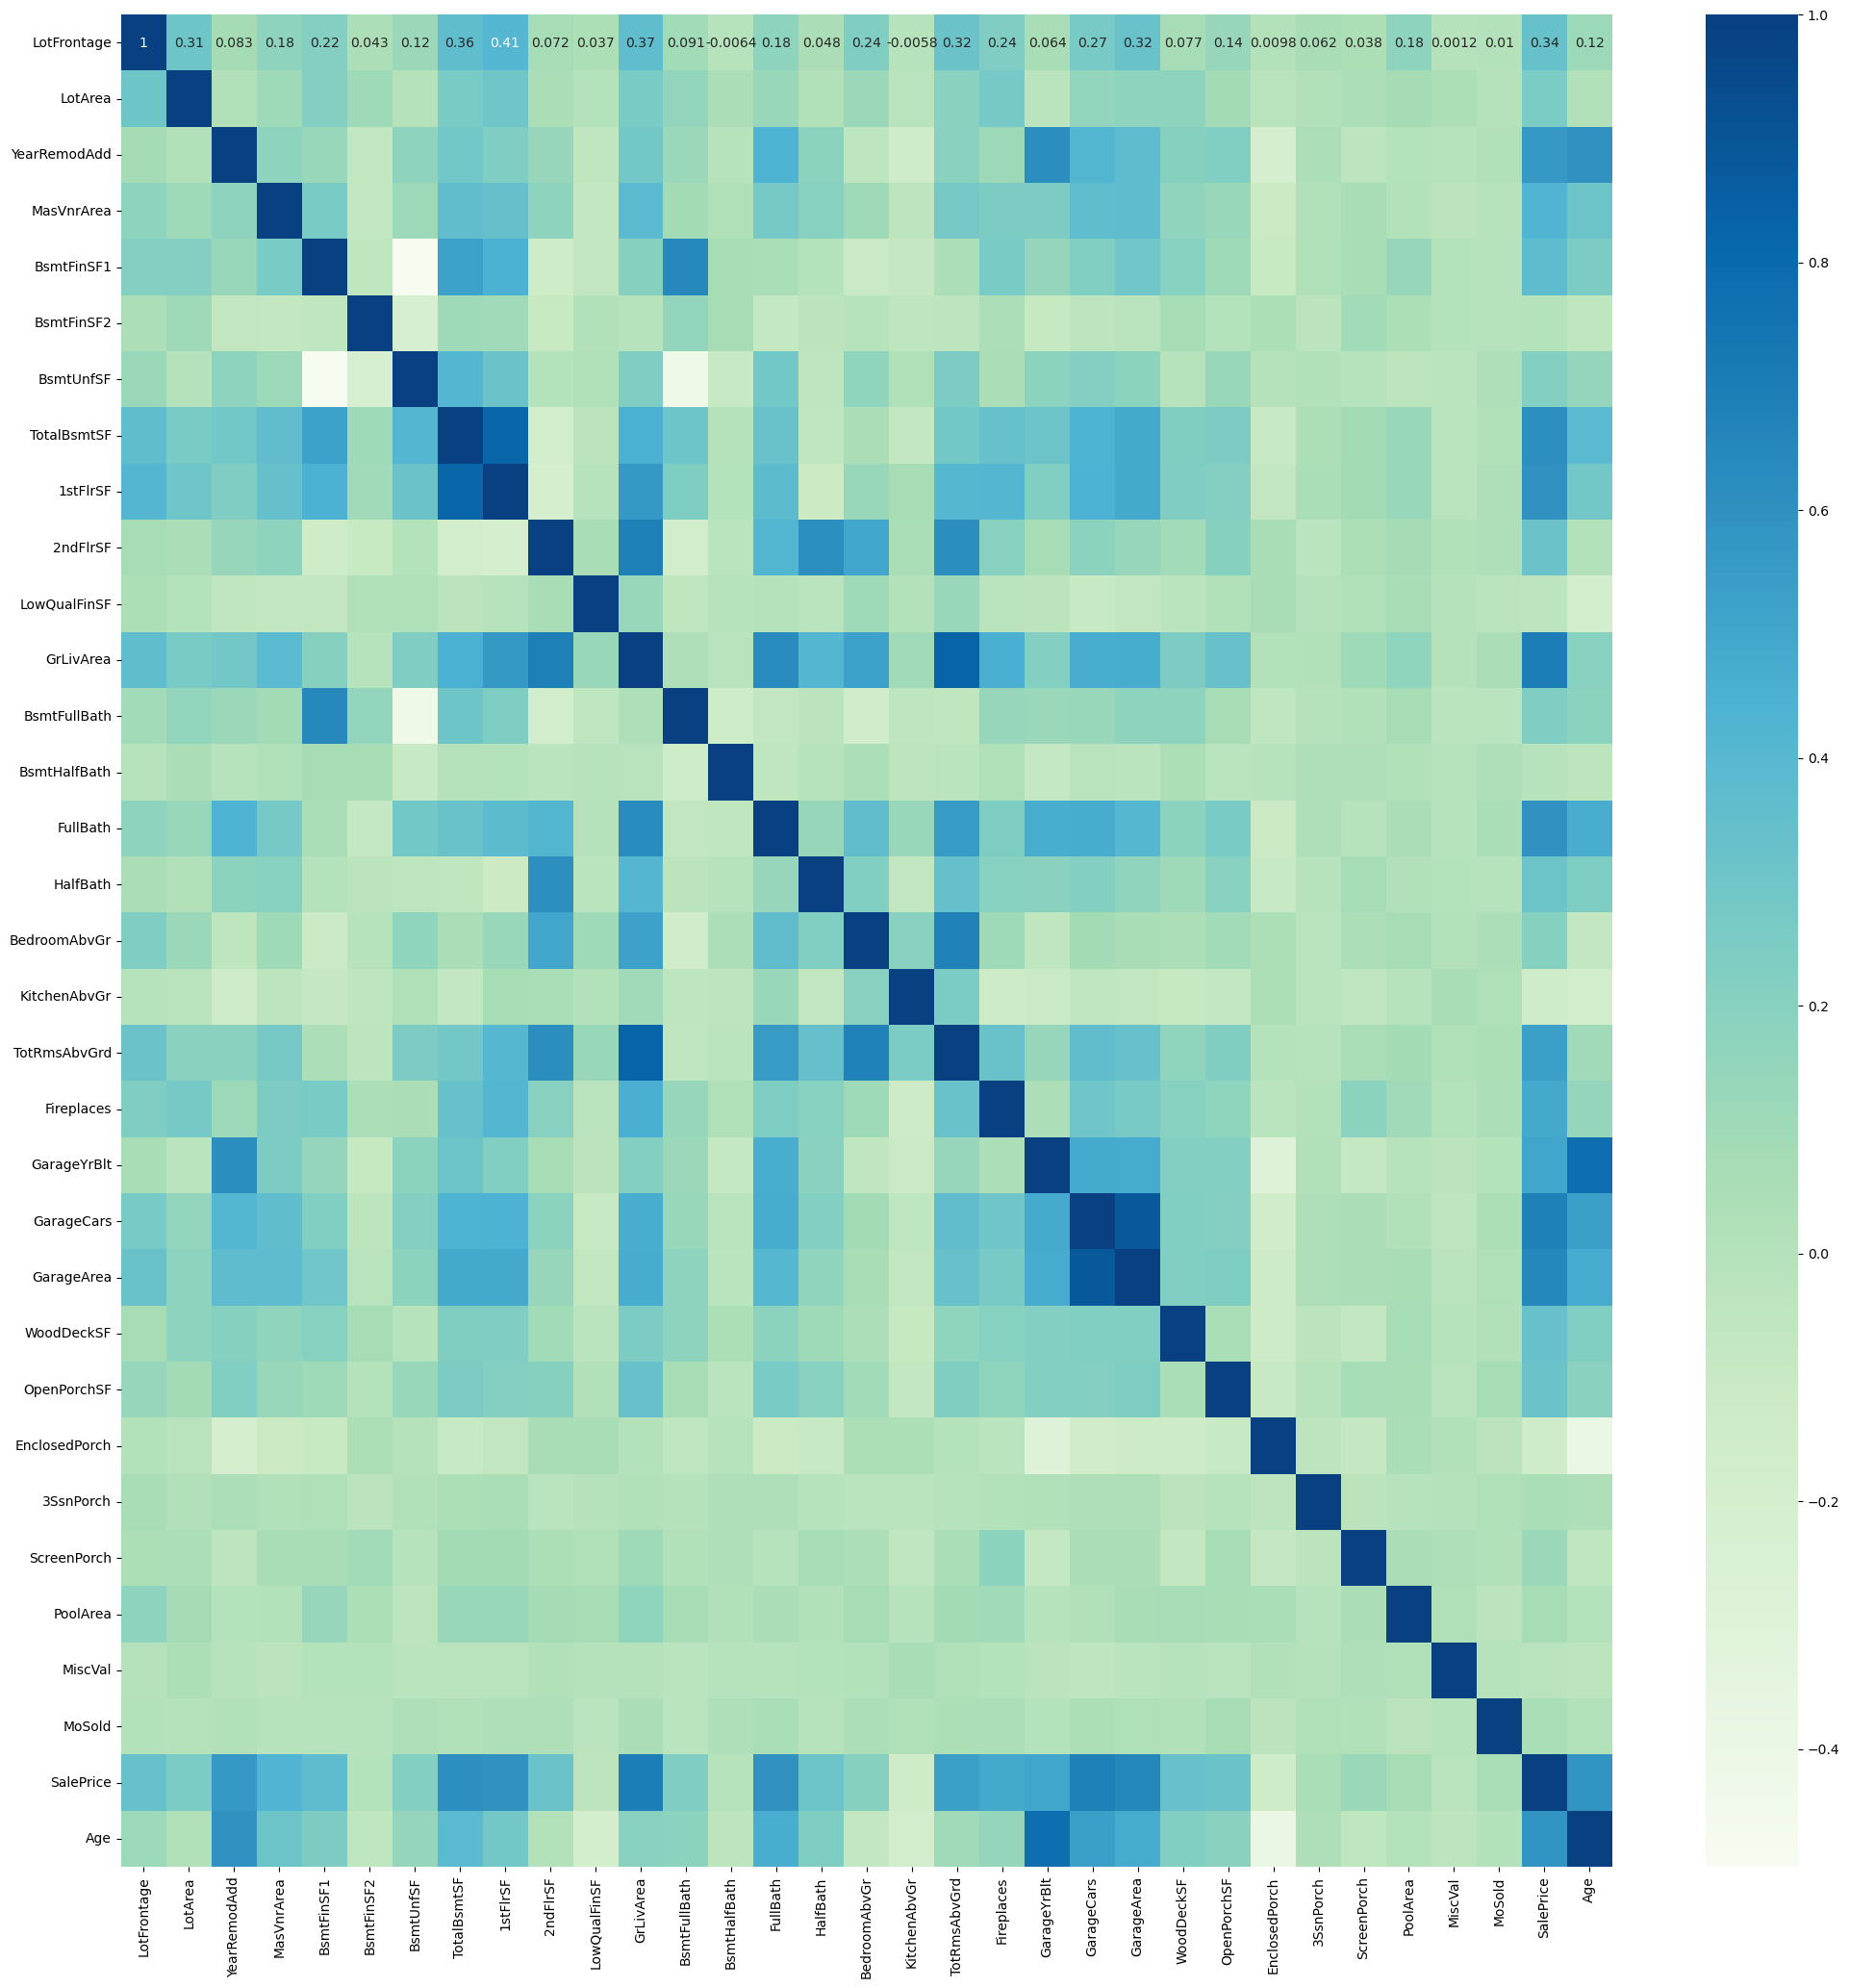

In [52]:
plt.figure(figsize=(25,25))
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap="GnBu")

In [53]:
cols = housing.corr(numeric_only=True).nlargest(10,"SalePrice").index
cm = np.corrcoef(housing[cols].values.T)

<Axes: >

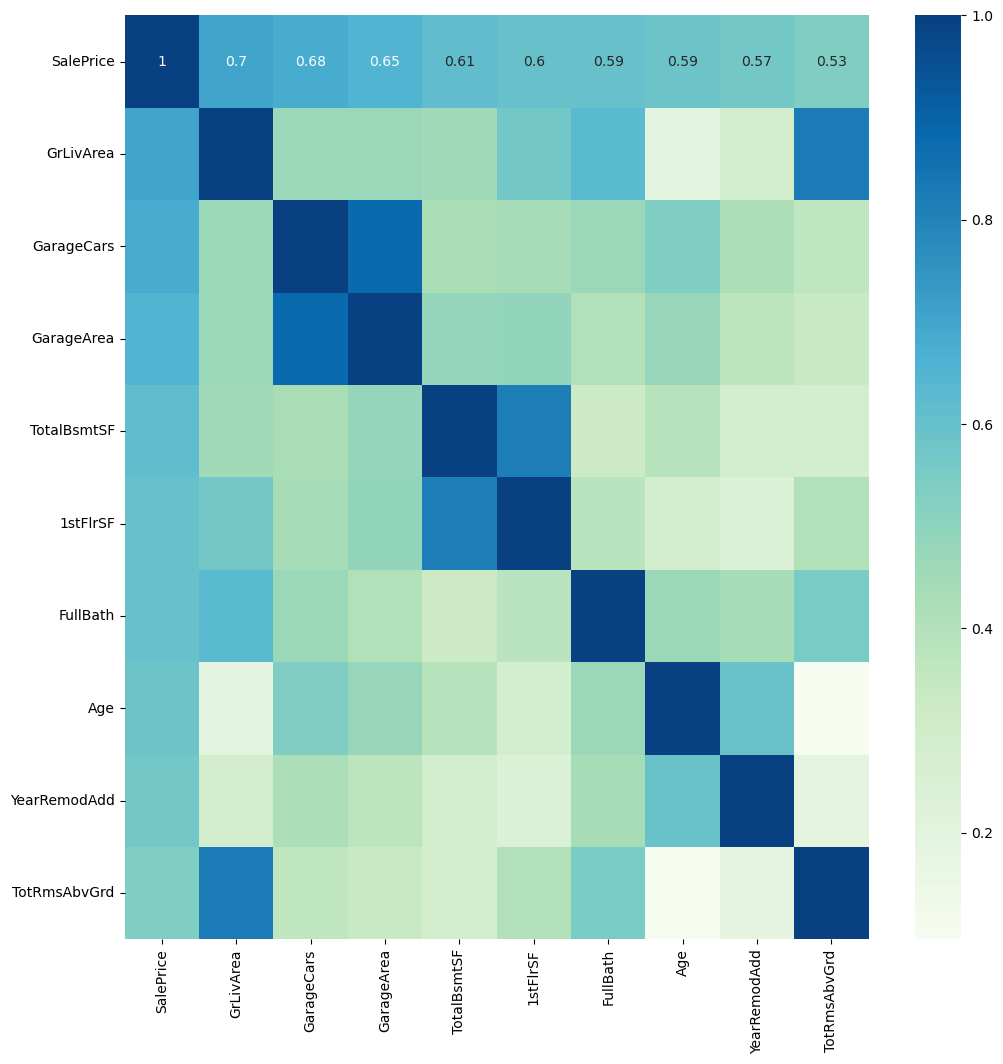

In [54]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, cmap = "GnBu", yticklabels=cols.values, xticklabels=cols.values)

<Figure size 2000x2000 with 0 Axes>

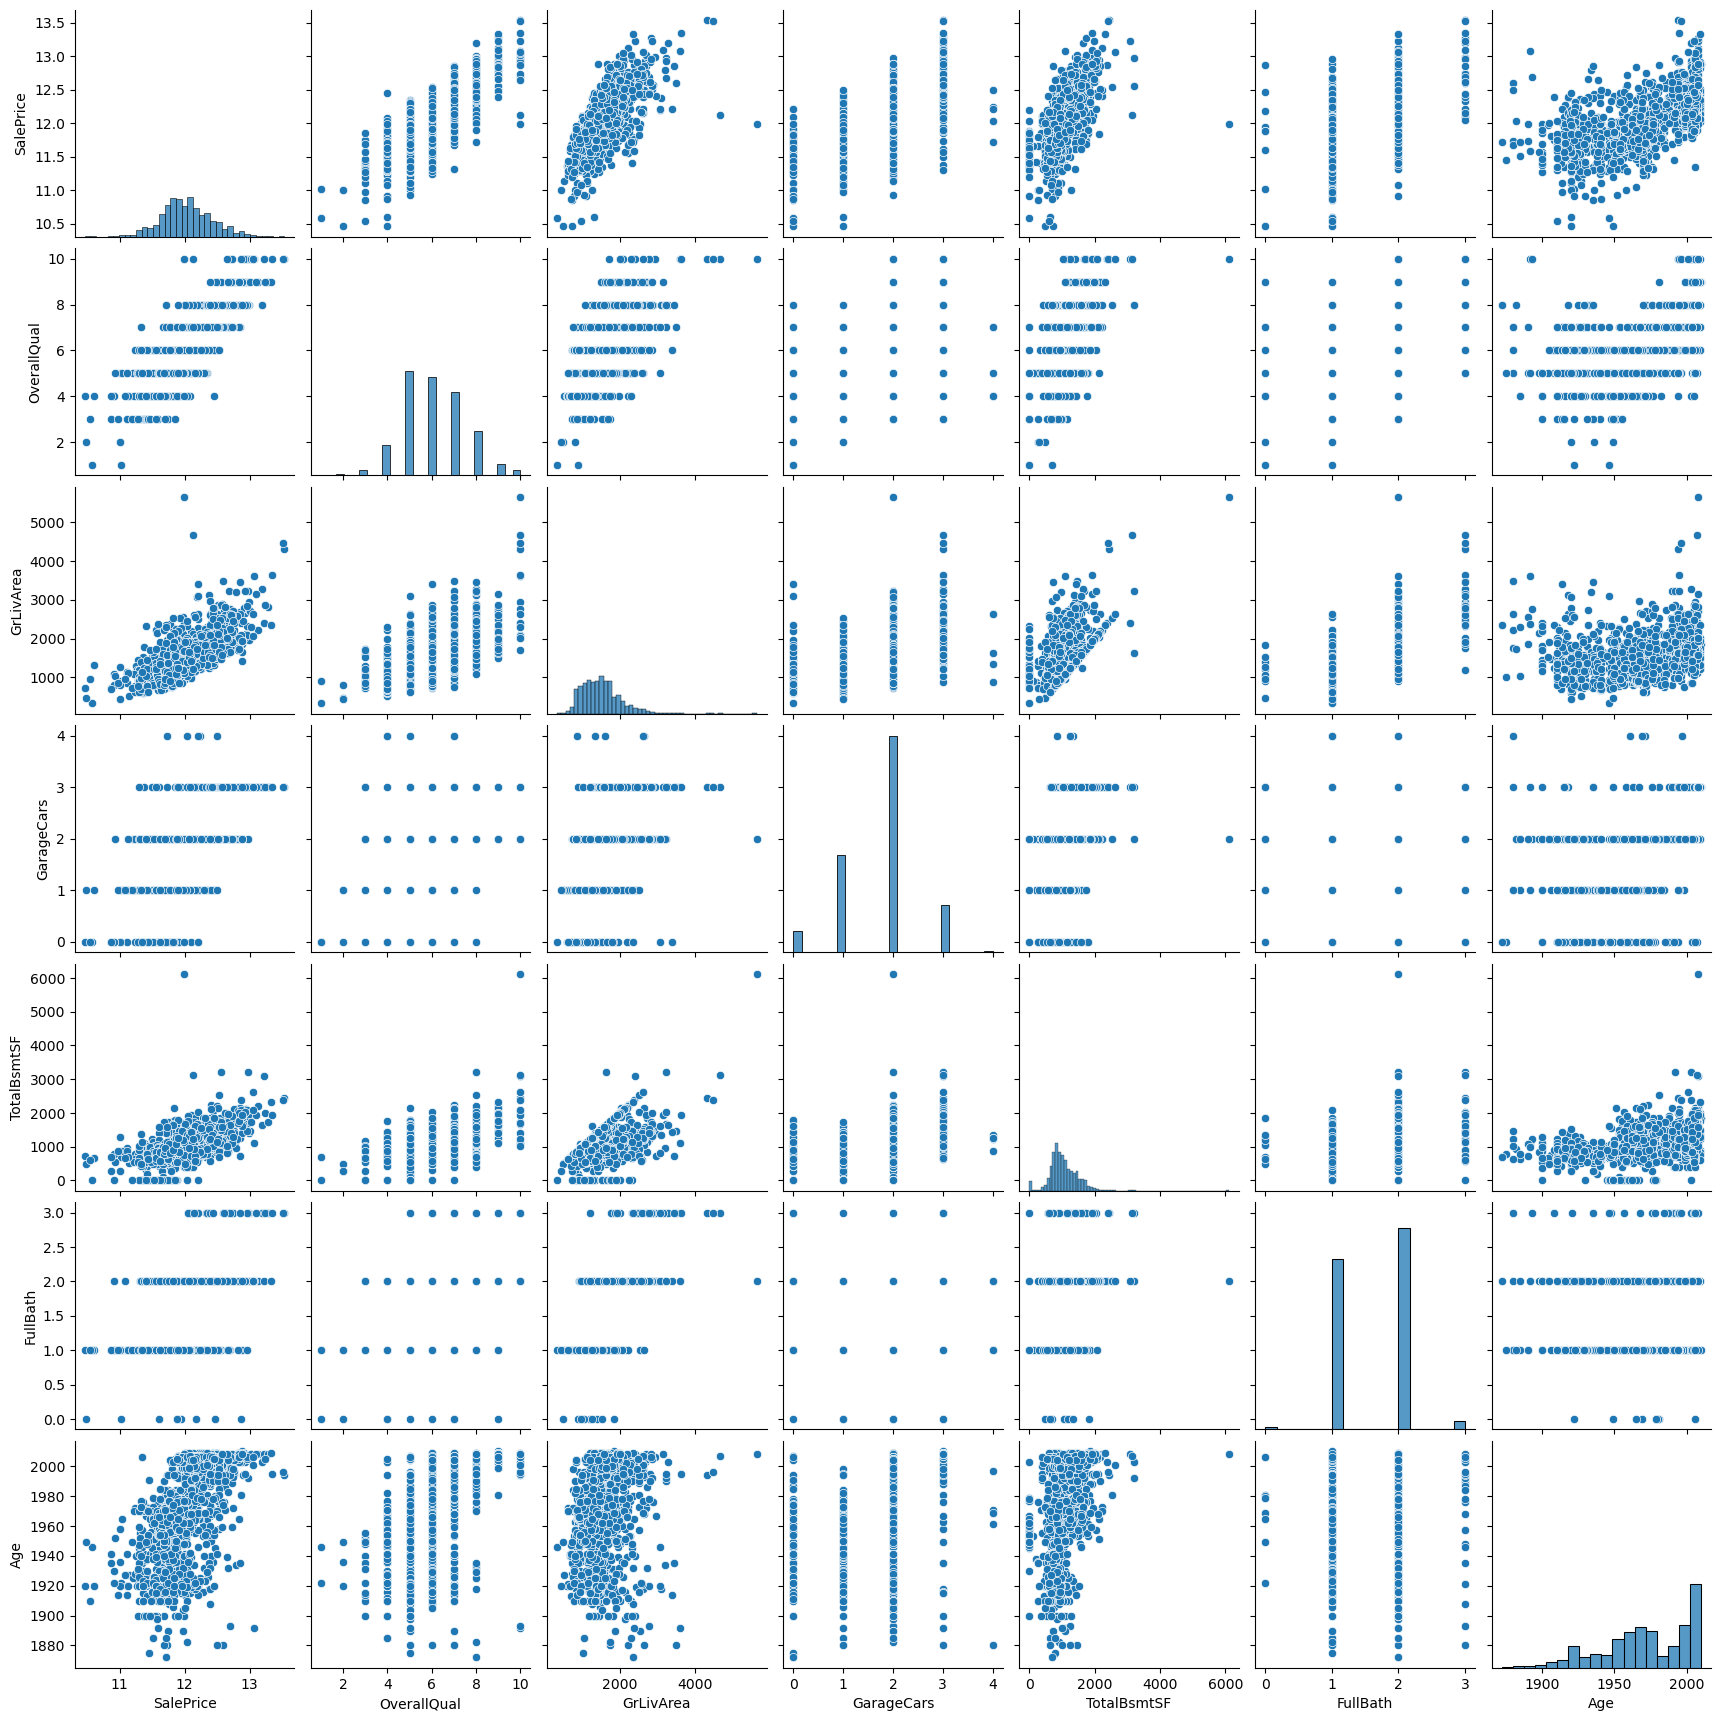

In [55]:
cols = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "Age"]
plt.figure(figsize=[20,20])
sns.pairplot(housing[cols])
plt.show()

In [56]:
housing_num = housing.select_dtypes(include=['int64', 'float64'])
housing_Cat = housing.select_dtypes(include = 'object')

In [57]:
housing_Cat_dm = pd.get_dummies(housing_Cat,drop_first=True, dtype=int)

In [58]:
housing_Cat_dm.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleConditi

In [59]:
house = pd.concat([housing_num, housing_Cat_dm], axis=1)

In [60]:
house.shape

(1460, 285)

In [61]:
x = house.drop(["SalePrice"], axis=1).copy()
y = house["SalePrice"].copy()

In [62]:
x.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [67]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

In [68]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [69]:
def eval_metrics(y_train, y_train_pred, y_test, y_pred):

    # Mean Squared Error for train and test data
    print("R2 score (train):", "%.2f" % r2_score(y_train, y_train_pred))
    print("R2 score (test):", "%.2f" % r2_score(y_test, y_pred))
    
    # R2 scores for train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5

    print("RMSE (Train):", "%.2f" % rmse_train)
    print("RMSE (Test):", "%.2f" % rmse_test)

In [70]:
# Import necessary libraries
import sklearn

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [71]:
# Applying Ridge regression with varying the hyperparameter "alpha"
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.9, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]}

ridge = Ridge()

ridgeCV = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=-1)

ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.9, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
ridgeCV.best_params_

{'alpha': 9.0}

In [113]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.09204121, 0.03143754, 0.03535638, 0.03616176, 0.03141899,
        0.03349252, 0.03437724, 0.04769964, 0.03731174, 0.03378801,
        0.0345531 , 0.03159699, 0.03001008, 0.03914046, 0.03755736,
        0.03647685, 0.04382486, 0.05923023, 0.04994912, 0.03061762,
        0.03286119, 0.03211551, 0.03524518, 0.03225765, 0.03164868,
        0.03098326, 0.03689938, 0.03314095]),
 'std_fit_time': array([0.02843167, 0.00068233, 0.00526645, 0.0060154 , 0.0104092 ,
        0.01018654, 0.00844925, 0.01432037, 0.00943087, 0.00360718,
        0.00253001, 0.00300028, 0.00374249, 0.01194505, 0.01160618,
        0.00673521, 0.00789823, 0.02025576, 0.0230868 , 0.00275956,
        0.00180758, 0.00566047, 0.00352824, 0.00334112, 0.00301559,
        0.01084694, 0.00499258, 0.00344582]),
 'mean_score_time': array([0.01131248, 0.00964537, 0.01039038, 0.00960679, 0.01325836,
        0.01652808, 0.0210268 , 0.01185508, 0.01222501, 0.01230431,
        0.01416383, 0.0127048 , 0.013840

In [78]:
ridge = Ridge(alpha=9)

In [79]:
ridge.fit(X_train, y_train)

Ridge(alpha=9)

In [80]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [81]:
eval_metrics(y_train, y_train_pred, y_test, y_pred)

R2 score (train): 0.92
R2 score (test): 0.89
RMSE (Train): 0.11
RMSE (Test): 0.14


In [83]:
ridgeCV_res = pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.087046,0.028714,0.020587,0.012964,0.0001,{'alpha': 0.0001},-0.097277,-0.119084,-0.107706,-0.095658,-0.097282,-0.103401,0.008937,26,-0.058931,-0.056468,-0.054066,-0.059166,-0.060994,-0.057925,0.002408
1,0.043117,0.022351,0.025230,0.015527,0.001,{'alpha': 0.001},-0.097240,-0.117070,-0.107505,-0.094727,-0.097005,-0.102709,0.008431,25,-0.059003,-0.056486,-0.054147,-0.059243,-0.061025,-0.057981,0.002402
2,0.032043,0.011797,0.011602,0.004382,0.01,{'alpha': 0.01},-0.097050,-0.115019,-0.106536,-0.093719,-0.094831,-0.101431,0.008160,23,-0.059726,-0.056526,-0.054863,-0.059871,-0.061396,-0.058477,0.002404
3,0.027505,0.004385,0.010150,0.000377,0.05,{'alpha': 0.05},-0.096381,-0.113476,-0.106358,-0.093413,-0.090946,-0.100115,0.008490,22,-0.061992,-0.056622,-0.057472,-0.061960,-0.062706,-0.060150,0.002562
4,0.030404,0.004536,0.011312,0.001717,0.1,{'alpha': 0.1},-0.095980,-0.112135,-0.107512,-0.093476,-0.089306,-0.099682,0.008675,21,-0.063667,-0.056757,-0.059335,-0.063585,-0.063799,-0.061429,0.002880


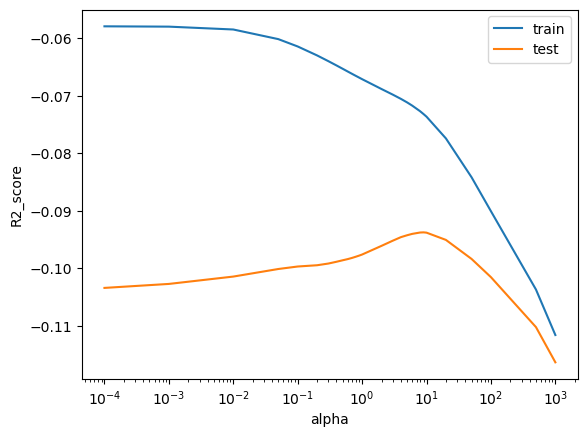

In [84]:
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_train_score'], label='train')
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_test_score'], label='test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [85]:
# Applying Ridge regression with varying the hyperparameter "alpha"
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.9, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]}

lasso = Lasso()

lassoCV = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=-1)

lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(alpha=9), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.9, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
lassoCV.best_params_

{'alpha': 9.0}

In [87]:
# Define the hyperparameter grid
params = {'alpha': np.array([0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000])}

# Define the Lasso regression model
lasso = Lasso()

# Define the GridSearchCV object
lassoCV = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, verbose=1, n_jobs=-1)
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e-03, 1.e-02, 5.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01, 5.e-01,
       6.e-01, 7.e-01, 8.e-01, 9.e-01, 1.e+00, 2.e+00, 3.e+00, 4.e+00,
       5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00, 1.e+01, 2.e+01, 5.e+01,
       1.e+02, 5.e+02, 1.e+03])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
lassoCV.best_params_

{'alpha': 0.001}

In [89]:
lasso = Lasso(alpha=0.001)

In [90]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [97]:
"""y_train_pred1 = lasso.predict(X_train)
y_pred1 = lasso.predict(X_test)"""

'y_train_pred1 = lasso.predict(X_train)\ny_pred1 = lasso.predict(X_test)'

In [99]:
eval_metrics(y_train, y_train_pred1, y_test, y_pred1)

R2 score (train): 0.90
R2 score (test): 0.88
RMSE (Train): 0.12
RMSE (Test): 0.14


In [96]:
lassoCv_res = pd.DataFrame(lassoCV.cv_results_)
lassoCv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.185675,0.052358,0.015590,0.004637,0.001,{'alpha': 0.001},-0.093932,-0.105081,-0.103247,-0.087261,-0.085545,-0.095013,0.008001,1,-0.082316,-0.071222,-0.079533,-0.082049,-0.080397,-0.079103,0.004074
1,0.035456,0.006663,0.011568,0.001552,0.01,{'alpha': 0.01},-0.117911,-0.133123,-0.126428,-0.109845,-0.113337,-0.120129,0.008548,2,-0.115348,-0.102353,-0.113773,-0.118908,-0.116858,-0.113448,0.005801
2,0.026321,0.002614,0.009969,0.000788,0.05,{'alpha': 0.05},-0.138582,-0.143975,-0.157565,-0.132186,-0.122821,-0.139026,0.011643,3,-0.139467,-0.121464,-0.138777,-0.139538,-0.140704,-0.135990,0.007289
3,0.026087,0.002313,0.011206,0.002395,0.1,{'alpha': 0.1},-0.169663,-0.168672,-0.202137,-0.165106,-0.153255,-0.171767,0.016269,4,-0.173799,-0.156454,-0.173424,-0.171659,-0.172140,-0.169495,0.006568
4,0.024314,0.001428,0.010949,0.002449,0.2,{'alpha': 0.2},-0.263334,-0.244047,-0.294601,-0.249113,-0.231224,-0.256464,0.021665,5,-0.260650,-0.248300,-0.255779,-0.253597,-0.256892,-0.255044,0.004073


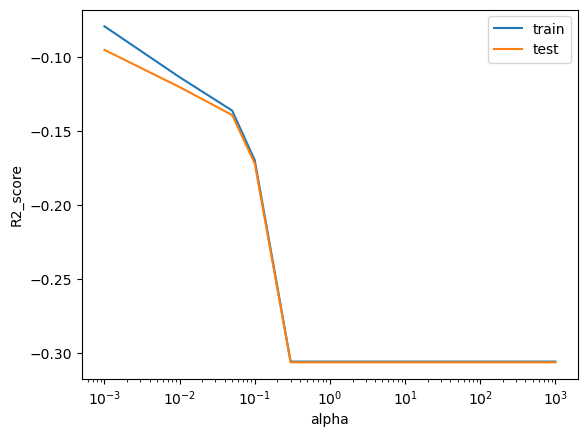

In [102]:
plt.plot(lassoCv_res['param_alpha'], lassoCv_res['mean_train_score'], label='train')
plt.plot(lassoCv_res['param_alpha'], lassoCv_res['mean_test_score'], label='test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [106]:
betas = pd.DataFrame(index=x.columns)
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lassoCV.best_estimator_.coef_
betas

,Ridge,Lasso
LotFrontage,-0.010360,-1.061138e-02
LotArea,0.015807,1.461029e-02
YearRemodAdd,0.025444,3.284735e-02
MasVnrArea,0.000616,-0.000000e+00
BsmtFinSF1,-0.004693,-0.000000e+00
BsmtFinSF2,0.008564,2.955858e-03
BsmtUnfSF,0.001711,6.675500e-03
TotalBsmtSF,-0.000157,2.559437e-03
1stFlrSF,0.034307,0.000000e+00
2ndFlrSF,0.045284,0.000000e+00


In [109]:
lasso_cols_removed = list(betas[betas['Lasso'] == 0].index)
print(lasso_cols_removed)

['MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'OpenPorchSF', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Street_Pave', 'Alley_None', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condi

In [110]:
print(len(lasso_cols_removed))

186


In [114]:
lasso_cols_removed = list(betas[betas['Lasso'] == 0].index)
print(lasso_cols_removed)

['MasVnrArea', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'OpenPorchSF', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Street_Pave', 'Alley_None', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Low', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condi

In [117]:
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.125080
Neighborhood_StoneBr    0.094778
Neighborhood_Crawfor    0.089726
OverallQual_8           0.084311
Exterior1st_BrkFace     0.079295
Neighborhood_NridgHt    0.078951
OverallCond_9           0.070484
CentralAir_Y            0.066799
Functional_Typ          0.066045
BsmtCond_TA             0.065102
Name: Ridge, dtype: float64

In [119]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.133239
Neighborhood_StoneBr    1.099415
Neighborhood_Crawfor    1.093874
OverallQual_8           1.087967
Exterior1st_BrkFace     1.082523
Neighborhood_NridgHt    1.082152
OverallCond_9           1.073028
CentralAir_Y            1.069081
Functional_Typ          1.068275
BsmtCond_TA             1.067268
Name: Ridge, dtype: float64

In [120]:
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.125080
Neighborhood_StoneBr    0.094778
Neighborhood_Crawfor    0.089726
OverallQual_8           0.084311
Exterior1st_BrkFace     0.079295
Neighborhood_NridgHt    0.078951
OverallCond_9           0.070484
CentralAir_Y            0.066799
Functional_Typ          0.066045
BsmtCond_TA             0.065102
Name: Ridge, dtype: float64